# Setup

In [105]:
# imports
import pandas as pd # for using pandas data frames
import numpy as np # for converting numpy array to data frame

from nltk.corpus import stopwords # stopwords dictionary import
import nltk
nltk.download('wordnet')
nltk.download('punkt')

# imports for graphs and plotting
import itertools
import collections
import matplotlib.pyplot as plt
import seaborn as sns

# import for TF-IDF vectorizer
import sys
%conda install --yes --prefix {sys.prefix} scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jorda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jorda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Note: you may need to restart the kernel to use updated packages.



EnvironmentLocationNotFound: Not a conda environment: c:\BSHC4_Workspace\Software Project 4\19103310-Final-Year-Project\Usersjordaanaconda3



In [6]:
# reading from csv data file as pandas data frame
df = pd.read_csv(r'data_files\capstone_airline_reviews3.csv')

# checking the data (rows 1-10)
print(df[1:10])

            airline  overall               author   review_date  \
1  Turkish Airlines      7.0  Christopher Hackley  8th May 2019   
2               NaN      NaN                  NaN           NaN   
3  Turkish Airlines      2.0        Adriana Pisoi  7th May 2019   
4               NaN      NaN                  NaN           NaN   
5  Turkish Airlines      3.0            M Galerko  7th May 2019   
6               NaN      NaN                  NaN           NaN   
7  Turkish Airlines     10.0          Zeshan Shah  6th May 2019   
8               NaN      NaN                  NaN           NaN   
9  Turkish Airlines      1.0           Pooja Jain  6th May 2019   

                                     customer_review aircraft  traveller_type  \
1  ✅ Trip Verified | London to Izmir via Istanbul...      NaN        Business   
2                                                NaN      NaN             NaN   
3  ✅ Trip Verified | Istanbul to Bucharest. We ma...      NaN  Family Leisure   
4    

# Data Exploration
#### From the output of the first 10 rows of data within the data frame I can see that every second row or so, is filled with 'NaN' values. I want to remove these rows and get an idea of the actual amount of reviews I have to work with. I will also look for other features such as the length of customer reviews.

In [7]:
# creating a data frame from raw data with 17 headings
data_frame = pd.DataFrame(np.array(df), columns = ['airline', 'overall', 'author', 'review_date', 'customer_review', 'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'recommended'])

In [8]:
# checking the result of the created data frame
data_frame.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,✅ Trip Verified | London to Izmir via Istanbul...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,✅ Trip Verified | Istanbul to Bucharest. We ma...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# checking the number of 'reviews' in the data frame
len(data_frame['customer_review'])

131895

##### The resulting length is 131,895 rows! From the outputs of the data frame, I know this is the result in many 'NaN' value rows. I also wish to perform a count of the words in each review and if I try do this on a data frame containing NaN values it will result in an error. So, it is important I remove these NaN rows now before proceeding.

In [10]:
# removing blank rows from data frame, setting threshold of 16, so requires 16 empty columns to be removed
data_frame = data_frame.dropna(thresh=16)

data_frame.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,✅ Trip Verified | London to Izmir via Istanbul...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,✅ Trip Verified | Istanbul to Bucharest. We ma...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,✅ Trip Verified | Rome to Prishtina via Istanb...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,May-19,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,✅ Trip Verified | Flew on Turkish Airlines IAD...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,✅ Trip Verified | Mumbai to Dublin via Istanbu...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,May-19,1.0,1.0,1.0,1.0,1.0,1.0,no


In [11]:
# checking the number of 'reviews' in the data frame after removing 'NaN values'
len(data_frame['customer_review'])

28497

In [12]:
# doing a wordcount of each review
data_frame['customer_review'].apply(lambda x: len(x.split()))

1         208
3          89
5         301
7         162
9          77
         ... 
131698    151
131700    104
131702     68
131704    125
131712    404
Name: customer_review, Length: 28497, dtype: int64

In [13]:
# getting a series for feature creation of wordcount
type(data_frame['customer_review'].apply(lambda x: len(x.split())))

pandas.core.series.Series

In [14]:
# checking different airlines
airlines = data_frame['airline'].unique()
print(airlines)

['Turkish Airlines' 'Qatar Airways' 'Emirates' 'Lufthansa'
 'KLM Royal Dutch Airlines' 'Virgin America' 'American Airlines'
 'Delta Air Lines' 'Southwest Airlines' 'United Airlines'
 'Jetblue Airways' 'Aegean Airlines' 'Aeroflot Russian Airlines'
 'Aeromexico' 'Air Canada' 'Air New Zealand' 'Alitalia' 'AirAsia'
 'Asiana Airlines' 'Avianca' 'Austrian Airlines' 'British Airways'
 'Brussels Airlines' 'China Eastern Airlines' 'China Southern Airlines'
 'Copa Airlines' 'Ethiopian Airlines' 'Egyptair' 'Finnair' 'Iberia'
 'ANA All Nippon Airways' 'easyJet' 'Korean Air' 'LATAM Airlines'
 'LOT Polish Airlines' 'Qantas Airways' 'Air France' 'Etihad Airways'
 'Pegasus Airlines' 'Royal Jordanian Airlines' 'Ryanair'
 'South African Airways' 'Saudi Arabian Airlines' 'TAP Portugal'
 'Eurowings' 'EVA Air' 'Royal Air Maroc' 'Singapore Airlines'
 'SAS Scandinavian' 'Swiss Intl Air Lines' 'Thai Airways' 'Air India'
 'Air Europa' 'Air Canada rouge' 'airBaltic' 'Air China'
 'Cathay Pacific Airways' 'Wizz A

In [15]:
# checking different aircrafts
aircraft = data_frame['aircraft'].unique()
print(aircraft)

[nan 'A330' 'Boeing 737-800 / A330-300' ...
 'Boeing 737-800 and Embraer 190' 'Boeing 737-400/ 737-800' 'boeing 767']


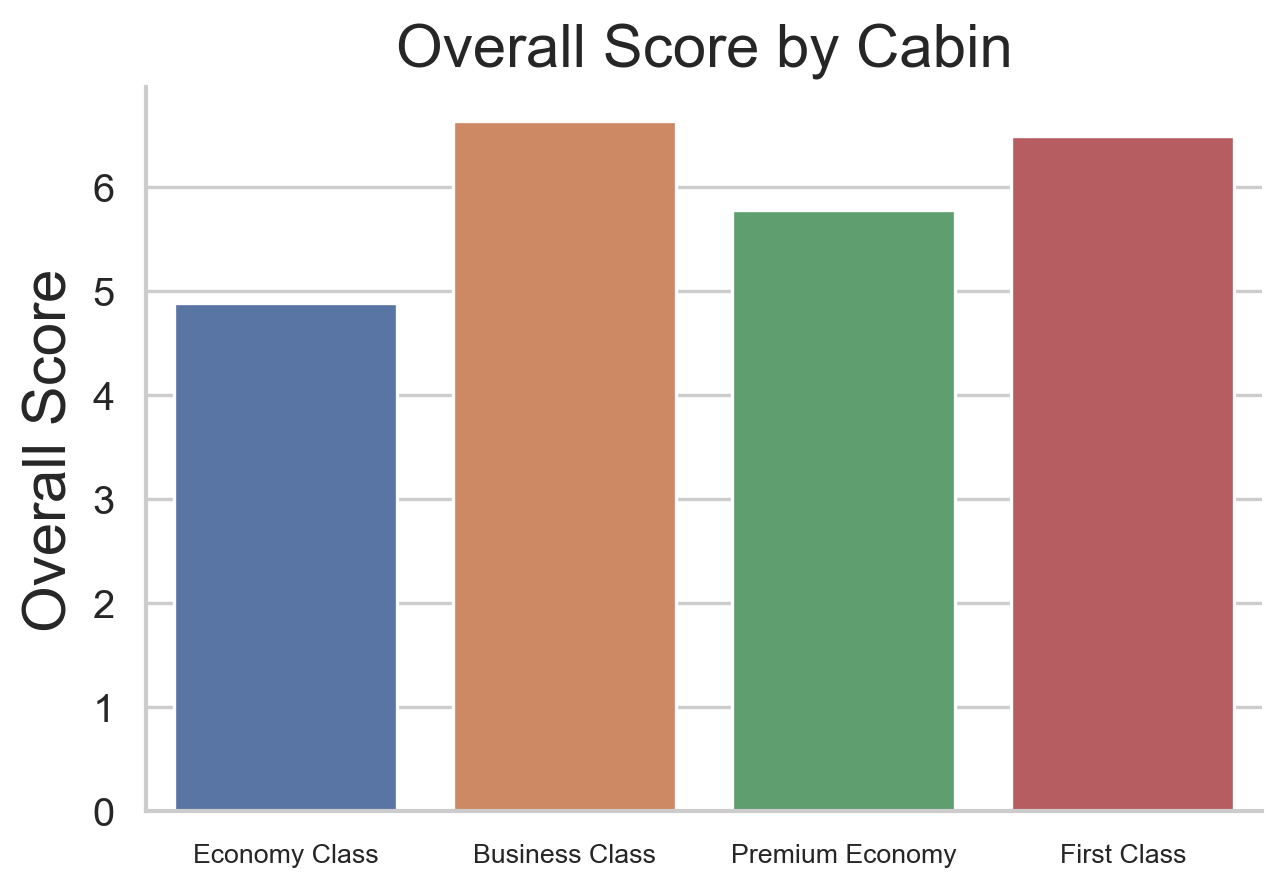

In [16]:
# create a barchart for cabin and overall score 
plt.rcParams['figure.dpi'] = 240
sns.set(style="whitegrid")
sns.barplot(data=data_frame, x="cabin", y="overall", ci=None)
plt.ylabel('Overall Score', size=18)
plt.xlabel('', size=10)
plt.title('Overall Score by Cabin', size=18)
plt.xticks(size=8)
plt.yticks(size=12)
sns.despine()

### Feature Creation
#### I want to add the word count of each customer_review to a new column within the data frame

In [17]:
# adding a column of 'wordcount' to the data frame
data_frame['word_count'] = data_frame['customer_review'].apply(lambda x: len(x.split()))
# checking the result
data_frame.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,word_count
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,✅ Trip Verified | London to Izmir via Istanbul...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,4.0,5.0,4.0,4.0,2.0,4.0,yes,208
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,✅ Trip Verified | Istanbul to Bucharest. We ma...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,4.0,1.0,1.0,1.0,1.0,1.0,no,89
5,Turkish Airlines,3.0,M Galerko,7th May 2019,✅ Trip Verified | Rome to Prishtina via Istanb...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,May-19,1.0,4.0,1.0,3.0,1.0,2.0,no,301
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,✅ Trip Verified | Flew on Turkish Airlines IAD...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,162
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,✅ Trip Verified | Mumbai to Dublin via Istanbu...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,May-19,1.0,1.0,1.0,1.0,1.0,1.0,no,77


# Data Cleaning
#### For this step, I want to clean the data further than removing blank rows. During this process the aim is to tidy the data of anything which may cause issues for a machine learning algorithm to interpret , or anything which may not provide any predictive value. This includes elements such as upper/lower case blocks of text, stop words, numbers, punctuation and whitespaces.

### Converting reviews to lowercase characters only.

In [18]:
# converting 'customer_review' to lowercase
data_frame['lowercase'] = data_frame['customer_review'].apply(lambda x: " ".join(word.lower() for word in x.split()))

# check result
data_frame.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,word_count,lowercase
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,✅ Trip Verified | London to Izmir via Istanbul...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,4.0,5.0,4.0,4.0,2.0,4.0,yes,208,✅ trip verified | london to izmir via istanbul...
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,✅ Trip Verified | Istanbul to Bucharest. We ma...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,4.0,1.0,1.0,1.0,1.0,1.0,no,89,✅ trip verified | istanbul to bucharest. we ma...
5,Turkish Airlines,3.0,M Galerko,7th May 2019,✅ Trip Verified | Rome to Prishtina via Istanb...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,May-19,1.0,4.0,1.0,3.0,1.0,2.0,no,301,✅ trip verified | rome to prishtina via istanb...
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,✅ Trip Verified | Flew on Turkish Airlines IAD...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,162,✅ trip verified | flew on turkish airlines iad...
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,✅ Trip Verified | Mumbai to Dublin via Istanbu...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,May-19,1.0,1.0,1.0,1.0,1.0,1.0,no,77,✅ trip verified | mumbai to dublin via istanbu...


### Removing Punctuation

In [19]:
# removing punctuation and adding to a new column in data frame
data_frame['punctuation'] = data_frame['lowercase'].str.replace('[^\w\s]', '')
data_frame.head()

C:\Users\jorda\AppData\Local\Temp/ipykernel_17244/2099087098.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_frame['punctuation'] = data_frame['lowercase'].str.replace('[^\w\s]', '')


,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,word_count,lowercase,punctuation
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,✅ Trip Verified | London to Izmir via Istanbul...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,4.0,5.0,4.0,4.0,2.0,4.0,yes,208,✅ trip verified | london to izmir via istanbul...,trip verified london to izmir via istanbul f...
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,✅ Trip Verified | Istanbul to Bucharest. We ma...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,4.0,1.0,1.0,1.0,1.0,1.0,no,89,✅ trip verified | istanbul to bucharest. we ma...,trip verified istanbul to bucharest we make ...
5,Turkish Airlines,3.0,M Galerko,7th May 2019,✅ Trip Verified | Rome to Prishtina via Istanb...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,May-19,1.0,4.0,1.0,3.0,1.0,2.0,no,301,✅ trip verified | rome to prishtina via istanb...,trip verified rome to prishtina via istanbul...
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,✅ Trip Verified | Flew on Turkish Airlines IAD...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,162,✅ trip verified | flew on turkish airlines iad...,trip verified flew on turkish airlines iadis...
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,✅ Trip Verified | Mumbai to Dublin via Istanbu...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,May-19,1.0,1.0,1.0,1.0,1.0,1.0,no,77,✅ trip verified | mumbai to dublin via istanbu...,trip verified mumbai to dublin via istanbul ...


### Removing Stopwords

In [20]:
# creating an english corpus of stop words
stop_words = stopwords.words('english')

In [21]:
# checking number of stop words available in this corpus
len(stop_words)

179

In [22]:
# checking the stop words included
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
# loop through every word in review in 'punctuation' col, if the word is not a stop word, return it; if it is, then don't return it
data_frame['stop_words'] = data_frame['punctuation'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))
data_frame.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,...,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,word_count,lowercase,punctuation,stop_words
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,✅ Trip Verified | London to Izmir via Istanbul...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,...,5.0,4.0,4.0,2.0,4.0,yes,208,✅ trip verified | london to izmir via istanbul...,trip verified london to izmir via istanbul f...,trip verified london izmir via istanbul first ...
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,✅ Trip Verified | Istanbul to Bucharest. We ma...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,...,1.0,1.0,1.0,1.0,1.0,no,89,✅ trip verified | istanbul to bucharest. we ma...,trip verified istanbul to bucharest we make ...,trip verified istanbul bucharest make check ai...
5,Turkish Airlines,3.0,M Galerko,7th May 2019,✅ Trip Verified | Rome to Prishtina via Istanb...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,May-19,...,4.0,1.0,3.0,1.0,2.0,no,301,✅ trip verified | rome to prishtina via istanb...,trip verified rome to prishtina via istanbul...,trip verified rome prishtina via istanbul flew...
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,✅ Trip Verified | Flew on Turkish Airlines IAD...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,...,5.0,5.0,5.0,5.0,5.0,yes,162,✅ trip verified | flew on turkish airlines iad...,trip verified flew on turkish airlines iadis...,trip verified flew turkish airlines iadistkhi ...
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,✅ Trip Verified | Mumbai to Dublin via Istanbu...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,May-19,...,1.0,1.0,1.0,1.0,1.0,no,77,✅ trip verified | mumbai to dublin via istanbu...,trip verified mumbai to dublin via istanbul ...,trip verified mumbai dublin via istanbul never...


### Frequency Count
#### The term 'trip verified' appears at the beginning of all of these reviews. I want to do a word frequency count to check if there is any other words or terms which are not stop words appearing in the reviews though, may not provide any kind of predictive value.

In [24]:
##### creating panda series of an array of all the words contained in the reviews
    # doing this by creating one giant review containing all words from all reviews
    # filtering by the top 50 results w/ [:50]
pd.Series(" ".join(data_frame['stop_words']).split()).value_counts()[:50]

flight           56082
service          19984
verified         19436
time             17409
food             15188
good             14696
seat             14256
trip             13587
seats            12928
crew             12703
staff            11935
airline          11475
one              11452
would            11364
airlines         11036
cabin            10937
us               10766
class            10327
flights          10125
plane             9850
hours             9707
review            9646
get               9203
via               9084
airport           9080
air               8817
business          8690
first             8414
even              7887
experience        7470
economy           7338
new               7271
boarding          7166
passengers        7160
fly               7158
back              7019
could             7007
hour              6866
entertainment     6367
meal              6210
told              6190
check             6177
aircraft          5808
great      

In [25]:
# now creating a list of extended stop words to remove, other words which may not provide predictive value
other_stop_words = ['verified', 'trip', 'get', 'got', 'via', 'us', 'would', 'also', 'even', 'one', 'could', 'told', 'like', 'didnt']
other_stop_words

['verified',
 'trip',
 'get',
 'got',
 'via',
 'us',
 'would',
 'also',
 'even',
 'one',
 'could',
 'told',
 'like',
 'didnt']

### Removing Further Stop Words
##### Now removing some other popular words which appeared in the top 50 results of frequent words. These words were chosen as they will not provide any predictive value, similar to the stop words list before. I will then add the cleaned reviews to a new column.

In [26]:
# create a column of cleaned reviews when removing extended stop words from the original stop words cleaned reviews
data_frame['clean_review'] = data_frame['stop_words'].apply(lambda x: " ".join(word for word in x.split() if word not in other_stop_words))
data_frame.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,...,food_bev,entertainment,ground_service,value_for_money,recommended,word_count,lowercase,punctuation,stop_words,clean_review
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,✅ Trip Verified | London to Izmir via Istanbul...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,...,4.0,4.0,2.0,4.0,yes,208,✅ trip verified | london to izmir via istanbul...,trip verified london to izmir via istanbul f...,trip verified london izmir via istanbul first ...,london izmir istanbul first time id flown tk f...
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,✅ Trip Verified | Istanbul to Bucharest. We ma...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,...,1.0,1.0,1.0,1.0,no,89,✅ trip verified | istanbul to bucharest. we ma...,trip verified istanbul to bucharest we make ...,trip verified istanbul bucharest make check ai...,istanbul bucharest make check airport take lug...
5,Turkish Airlines,3.0,M Galerko,7th May 2019,✅ Trip Verified | Rome to Prishtina via Istanb...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,May-19,...,1.0,3.0,1.0,2.0,no,301,✅ trip verified | rome to prishtina via istanb...,trip verified rome to prishtina via istanbul...,trip verified rome prishtina via istanbul flew...,rome prishtina istanbul flew company several t...
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,✅ Trip Verified | Flew on Turkish Airlines IAD...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,...,5.0,5.0,5.0,5.0,yes,162,✅ trip verified | flew on turkish airlines iad...,trip verified flew on turkish airlines iadis...,trip verified flew turkish airlines iadistkhi ...,flew turkish airlines iadistkhi return khiisti...
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,✅ Trip Verified | Mumbai to Dublin via Istanbu...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,May-19,...,1.0,1.0,1.0,1.0,no,77,✅ trip verified | mumbai to dublin via istanbu...,trip verified mumbai to dublin via istanbul ...,trip verified mumbai dublin via istanbul never...,mumbai dublin istanbul never book turkish airl...


### Frequency Count Again...
##### Getting another frequency count of words in the reviews in order to see if any other non predictive / non helpful words appear in the top results. If so, I will add these to the above list of 'other_stop_words' in order to remove them

In [27]:
# getting a new frequency count to check for more words, returning top 50 results
pd.Series(" ".join(data_frame['clean_review']).split()).value_counts()[:50]

flight           56082
service          19984
time             17409
food             15188
good             14696
seat             14256
seats            12928
crew             12703
staff            11935
airline          11475
airlines         11036
cabin            10937
class            10327
flights          10125
plane             9850
hours             9707
review            9646
airport           9080
air               8817
business          8690
first             8414
experience        7470
economy           7338
new               7271
boarding          7166
passengers        7160
fly               7158
back              7019
hour              6866
entertainment     6367
meal              6210
check             6177
aircraft          5808
great             5792
comfortable       5634
delayed           5624
luggage           5447
return            5380
minutes           5295
never             5291
flying            5152
2                 5112
friendly          5075
customer   

In [28]:
data_frame.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,...,food_bev,entertainment,ground_service,value_for_money,recommended,word_count,lowercase,punctuation,stop_words,clean_review
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,✅ Trip Verified | London to Izmir via Istanbul...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,...,4.0,4.0,2.0,4.0,yes,208,✅ trip verified | london to izmir via istanbul...,trip verified london to izmir via istanbul f...,trip verified london izmir via istanbul first ...,london izmir istanbul first time id flown tk f...
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,✅ Trip Verified | Istanbul to Bucharest. We ma...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,...,1.0,1.0,1.0,1.0,no,89,✅ trip verified | istanbul to bucharest. we ma...,trip verified istanbul to bucharest we make ...,trip verified istanbul bucharest make check ai...,istanbul bucharest make check airport take lug...
5,Turkish Airlines,3.0,M Galerko,7th May 2019,✅ Trip Verified | Rome to Prishtina via Istanb...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,May-19,...,1.0,3.0,1.0,2.0,no,301,✅ trip verified | rome to prishtina via istanb...,trip verified rome to prishtina via istanbul...,trip verified rome prishtina via istanbul flew...,rome prishtina istanbul flew company several t...
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,✅ Trip Verified | Flew on Turkish Airlines IAD...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,...,5.0,5.0,5.0,5.0,yes,162,✅ trip verified | flew on turkish airlines iad...,trip verified flew on turkish airlines iadis...,trip verified flew turkish airlines iadistkhi ...,flew turkish airlines iadistkhi return khiisti...
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,✅ Trip Verified | Mumbai to Dublin via Istanbu...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,May-19,...,1.0,1.0,1.0,1.0,no,77,✅ trip verified | mumbai to dublin via istanbu...,trip verified mumbai to dublin via istanbul ...,trip verified mumbai dublin via istanbul never...,mumbai dublin istanbul never book turkish airl...


### Lemmatization
#### This is the process of taking words and reducing them to the base meaning i.e. cutting back words from their different endings

In [29]:
# Loop through the words and lemmatize each word from clean review column
    # Word(word).lemmatize creates a textblob object of the word then applies the lemmatize function
    # creating a new column in data_frame w/ lemmatized words
#data_frame['lemmatized'] = data_frame['clean_review'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))
#data_frame.head()

# applying tokenization and lemmatization to clean data
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
data_frame['lemmatized'] = data_frame['clean_review'].apply(lemmatize_text)
data_frame.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,...,entertainment,ground_service,value_for_money,recommended,word_count,lowercase,punctuation,stop_words,clean_review,lemmatized
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,✅ Trip Verified | London to Izmir via Istanbul...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,...,4.0,2.0,4.0,yes,208,✅ trip verified | london to izmir via istanbul...,trip verified london to izmir via istanbul f...,trip verified london izmir via istanbul first ...,london izmir istanbul first time id flown tk f...,"[london, izmir, istanbul, first, time, id, flo..."
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,✅ Trip Verified | Istanbul to Bucharest. We ma...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,...,1.0,1.0,1.0,no,89,✅ trip verified | istanbul to bucharest. we ma...,trip verified istanbul to bucharest we make ...,trip verified istanbul bucharest make check ai...,istanbul bucharest make check airport take lug...,"[istanbul, bucharest, make, check, airport, ta..."
5,Turkish Airlines,3.0,M Galerko,7th May 2019,✅ Trip Verified | Rome to Prishtina via Istanb...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,May-19,...,3.0,1.0,2.0,no,301,✅ trip verified | rome to prishtina via istanb...,trip verified rome to prishtina via istanbul...,trip verified rome prishtina via istanbul flew...,rome prishtina istanbul flew company several t...,"[rome, prishtina, istanbul, flew, company, sev..."
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,✅ Trip Verified | Flew on Turkish Airlines IAD...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,...,5.0,5.0,5.0,yes,162,✅ trip verified | flew on turkish airlines iad...,trip verified flew on turkish airlines iadis...,trip verified flew turkish airlines iadistkhi ...,flew turkish airlines iadistkhi return khiisti...,"[flew, turkish, airline, iadistkhi, return, kh..."
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,✅ Trip Verified | Mumbai to Dublin via Istanbu...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,May-19,...,1.0,1.0,1.0,no,77,✅ trip verified | mumbai to dublin via istanbu...,trip verified mumbai to dublin via istanbul ...,trip verified mumbai dublin via istanbul never...,mumbai dublin istanbul never book turkish airl...,"[mumbai, dublin, istanbul, never, book, turkis..."


### Creating Graph of Most Frequent Words
#### Using this graph as a quick visualization of the most common words within the reviews.

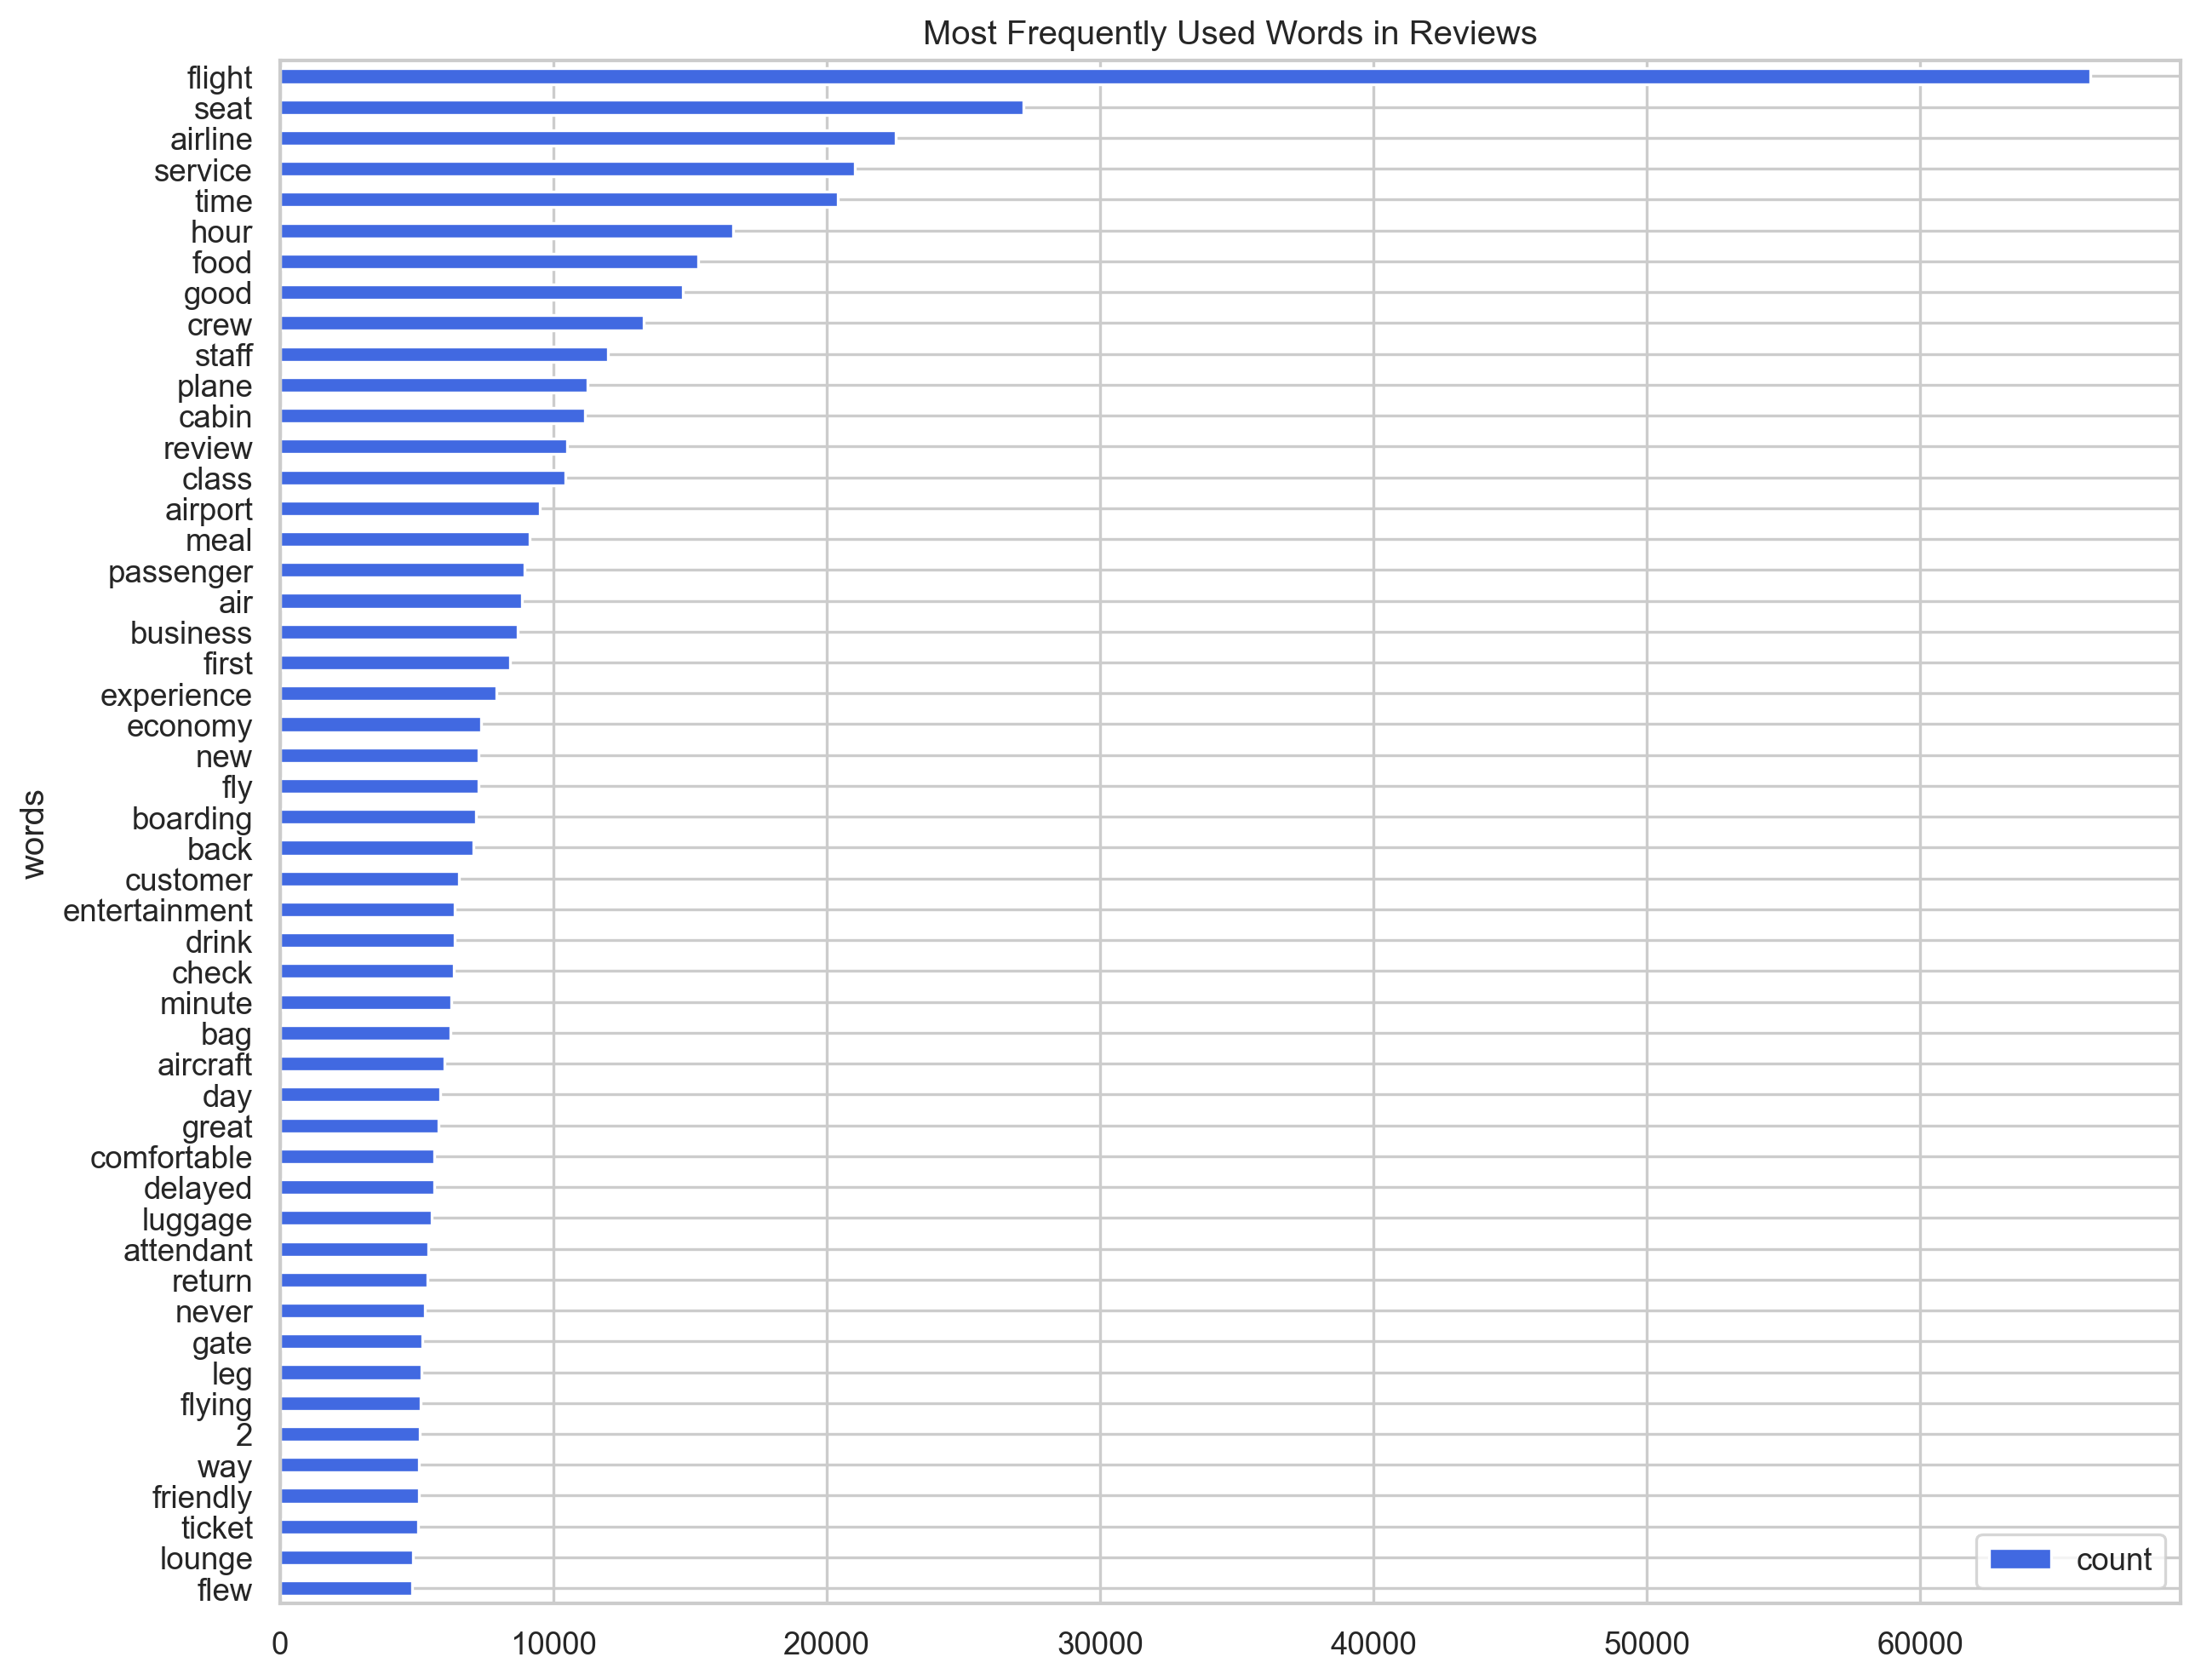

In [30]:
# text exploratory analysis - https://www.enjoyalgorithms.com/blog/sentiment-analysis-using-machine-learning

lemmatized_tokens = list(data_frame["lemmatized"])
token_list = list(itertools.chain(*lemmatized_tokens))
counts_no = collections.Counter(token_list)

clean_reviews = pd.DataFrame(counts_no.most_common(50), columns = ['words', 'count'])
fig, ax = plt.subplots(figsize=(12, 10))
clean_reviews.sort_values(by='count').plot.barh( x = 'words', y = 'count', ax = ax, color = "royalblue")
ax.set_title("Most Frequently Used Words in Reviews")
plt.show()

## TF-IDF (Term Frequency - Inverse Document Frequency)
#### This approach is a way of discovering how relevant a word is to a document within a collection of documents. This is done by multiplying the number of times the word appears in a document with the inverse document frequency of the word across a set of documents.
#### In my above data exploration, most of the top values begin to fall under 10,000 occurences roughly after the first 25 results. So I will limit the number of features to 200 for now as 5-10 thousand occurances is still very high for the bottom half of the top 50 results. I may play around with this feature in order to get an idea of the results.

In [31]:
# Creating a vectorizer for each value in each field of the review
tfidf_converter = TfidfVectorizer(max_features=300)

# creating new field within data_frame for storing array
vectorized_features = tfidf_converter.fit_transform(data_frame['clean_review']).toarray()

vectorized_features.shape

(28497, 300)

##### I now have a vectorized value for each review sentence

In [32]:
# checking how this array of tf-idf values looks for a random sentence
vectorized_features[4]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.29483299,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.26391425, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.25442248,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.13938755, 0.        , 0.        , 0.        , 0.     

In [33]:
#
vectorized_features.shape

(28497, 300)

In [34]:
data_frame.shape[0]
# create new data frame, which pulls in overall score value and array from list of array lists

28497

### Creating a data frame containing the array of vectorized features with the review score.

In [35]:
review_df = pd.DataFrame(vectorized_features, index=vectorized_features[:,0])

In [36]:
review_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.066958,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.093367,0.0,0.0,0.000000,0.0
0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.103006,0.000000,...,0.0,0.0,0.0,0.0,0.483886,0.000000,0.0,0.0,0.000000,0.0
0.092061,0.092061,0.0,0.09981,0.096135,0.0,0.0,0.000000,0.070468,0.000000,0.056607,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.092826,0.0
0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.340673,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.294833,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [37]:
review_df["ReviewScore"] = data_frame["overall"].to_numpy()

In [38]:
# checking the reviews
review_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,ReviewScore
0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.066958,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.093367,0.0,0.0,0.000000,0.0,7.0
0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.103006,0.000000,...,0.0,0.0,0.0,0.483886,0.000000,0.0,0.0,0.000000,0.0,2.0
0.092061,0.092061,0.0,0.09981,0.096135,0.0,0.0,0.000000,0.070468,0.000000,0.056607,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.092826,0.0,3.0
0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.340673,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,10.0
0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.294833,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.0


##### I now have a data frame containing a numerical vector for each of 100 features in the customer review as well as the corresponding review score.

In [39]:
review_df.shape

(28497, 301)

In [40]:
# exporting dataframe to csv for quick manual review
review_df.to_csv(r'data_files\vectorized_data03.csv', index = False)

In [41]:
vectorized_data = pd.read_csv(r'data_files\vectorized_data03.csv')

In [42]:
vectorized_data = vectorized_data[~(np.isnan(vectorized_data).any(axis=1))]

In [43]:
vectorized_data.shape

(28496, 301)

### Splitting the Data

In [44]:
from sklearn.model_selection import train_test_split

# seperate data into training / test splits (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(vectorized_data.loc[:,vectorized_data.columns != 'ReviewScore'], vectorized_data['ReviewScore'], test_size=0.3, random_state=109) 

## Creating SVM Model

In [45]:
# import support vector machine model library
from sklearn import svm

### Linear Kernel

In [46]:
# import support vector machine model library
from sklearn import svm

# create a classifier using a 'linear kernal'
classifier = svm.SVC(kernel='linear') # Linear Kernel

In [47]:
# checking for NaN and that values are finite
vectorized_data.isnull().values.any()

False

In [48]:
# train the svm model using the training sets
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [49]:
# predict a response for the testing set
y_pred = classifier.predict(x_test)
y_pred

array([ 1.,  1., 10., ...,  8.,  9.,  6.])

In [50]:
# importing sklearn module for accuracy metrics
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
# printing report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.52      0.93      0.67      2027
         2.0       0.23      0.02      0.04       789
         3.0       0.15      0.05      0.08       607
         4.0       0.22      0.03      0.06       380
         5.0       0.17      0.09      0.12       377
         6.0       0.18      0.04      0.07       388
         7.0       0.24      0.14      0.17       635
         8.0       0.30      0.38      0.33      1018
         9.0       0.36      0.35      0.35      1205
        10.0       0.44      0.53      0.48      1123

    accuracy                           0.41      8549
   macro avg       0.28      0.26      0.24      8549
weighted avg       0.34      0.41      0.34      8549



In [52]:
# model accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.4104573634343198


In [53]:
# check precision of the model
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))

Precision: 0.3407666130955207


In [54]:
# model recall, what % of positive tuples are labeled correctly
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))

Recall: 0.25881528902451495


### RBF Kernel

In [55]:
# create a classifier using a 'linear kernal'
classifier_rbf = svm.SVC(kernel='rbf') # RBF Kernel

In [56]:
# train the svm model using the training sets
classifier_rbf.fit(x_train, y_train)

SVC()

In [57]:
# predict a response for the testing set
y_pred = classifier_rbf.predict(x_test)
y_pred

array([ 1.,  1., 10., ..., 10.,  9.,  8.])

In [58]:
# printing report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.53      0.93      0.68      2027
         2.0       0.39      0.09      0.15       789
         3.0       0.29      0.10      0.15       607
         4.0       0.57      0.06      0.11       380
         5.0       0.29      0.13      0.18       377
         6.0       0.35      0.06      0.10       388
         7.0       0.31      0.17      0.22       635
         8.0       0.32      0.43      0.37      1018
         9.0       0.40      0.40      0.40      1205
        10.0       0.45      0.56      0.50      1123

    accuracy                           0.44      8549
   macro avg       0.39      0.29      0.29      8549
weighted avg       0.41      0.44      0.38      8549



In [59]:
# model accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.44215697742426013


In [60]:
# check precision of the model
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))

Precision: 0.41377064204254366


In [61]:
# model recall, what % of positive tuples are labeled correctly
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))

Recall: 0.2937223271303884


### Using GridsearchCV 
#### to create a loop of hyperparameters matching the 'estimations' of SVC and re-running the model with these parameters to find the best fit.
##### commented out to avoid re-running.

### Attempting w/ 'linear' & 'rbf' kernel

In [ ]:
from sklearn.model_selection import GridSearchCV

# define a parameter range
#param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['linear']}

#grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

#grid.fit(x_train, y_train)

In [ ]:
#print(grid.best_params_)

In [ ]:
#print(grid.best_estimator_)

In [ ]:
#grid_predictions = grid.predict(x_test)

# print classification report
#print(classification_report(y_test, grid_predictions))

### Attempting w/ 'rbf' kernel

In [ ]:
# define a parameter range
#param_grid = {'C': [0.1, 1, 10, 100, 1000],
           #  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
           #  'kernel': ['rbf']}

#grid02 = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

#grid02.fit(x_train, y_train)

In [ ]:
#print(grid.best_params_)

In [ ]:
#print(grid.best_estimator_)

In [ ]:
#grid_predictions = grid02.predict(x_test)

# print classification report
#print(classification_report(y_test, grid_predictions))

### Tabled Results 'Linear' kernel Run

#### These are results obtained from a >24 hour run of the above code. The results were saved to Excel for use of without needing to re-run the hyperparameter tuning loop, saving time.

In [62]:
svm_linear_results = pd.read_csv(r'data_files\linear_results_table.csv')

In [63]:
print(svm_linear_results[1:10])

     C  gamma  kernel  score  total_time
1  0.1    1.0  linear  0.366        49.5
2  0.1    1.0  linear  0.382        56.1
3  0.1    1.0  linear  0.363        54.9
4  0.1    1.0  linear  0.369        52.4
5  0.1    0.1  linear  0.372        57.4
6  0.1    0.1  linear  0.366        50.9
7  0.1    0.1  linear  0.382        66.0
8  0.1    0.1  linear  0.363        56.7
9  0.1    0.1  linear  0.369        53.6


In [64]:
print(svm_linear_results['score'].mean())

0.37419008264754133


In [65]:
max_value_linear = svm_linear_results['score'].max()
print(max_value_linear)

0.388


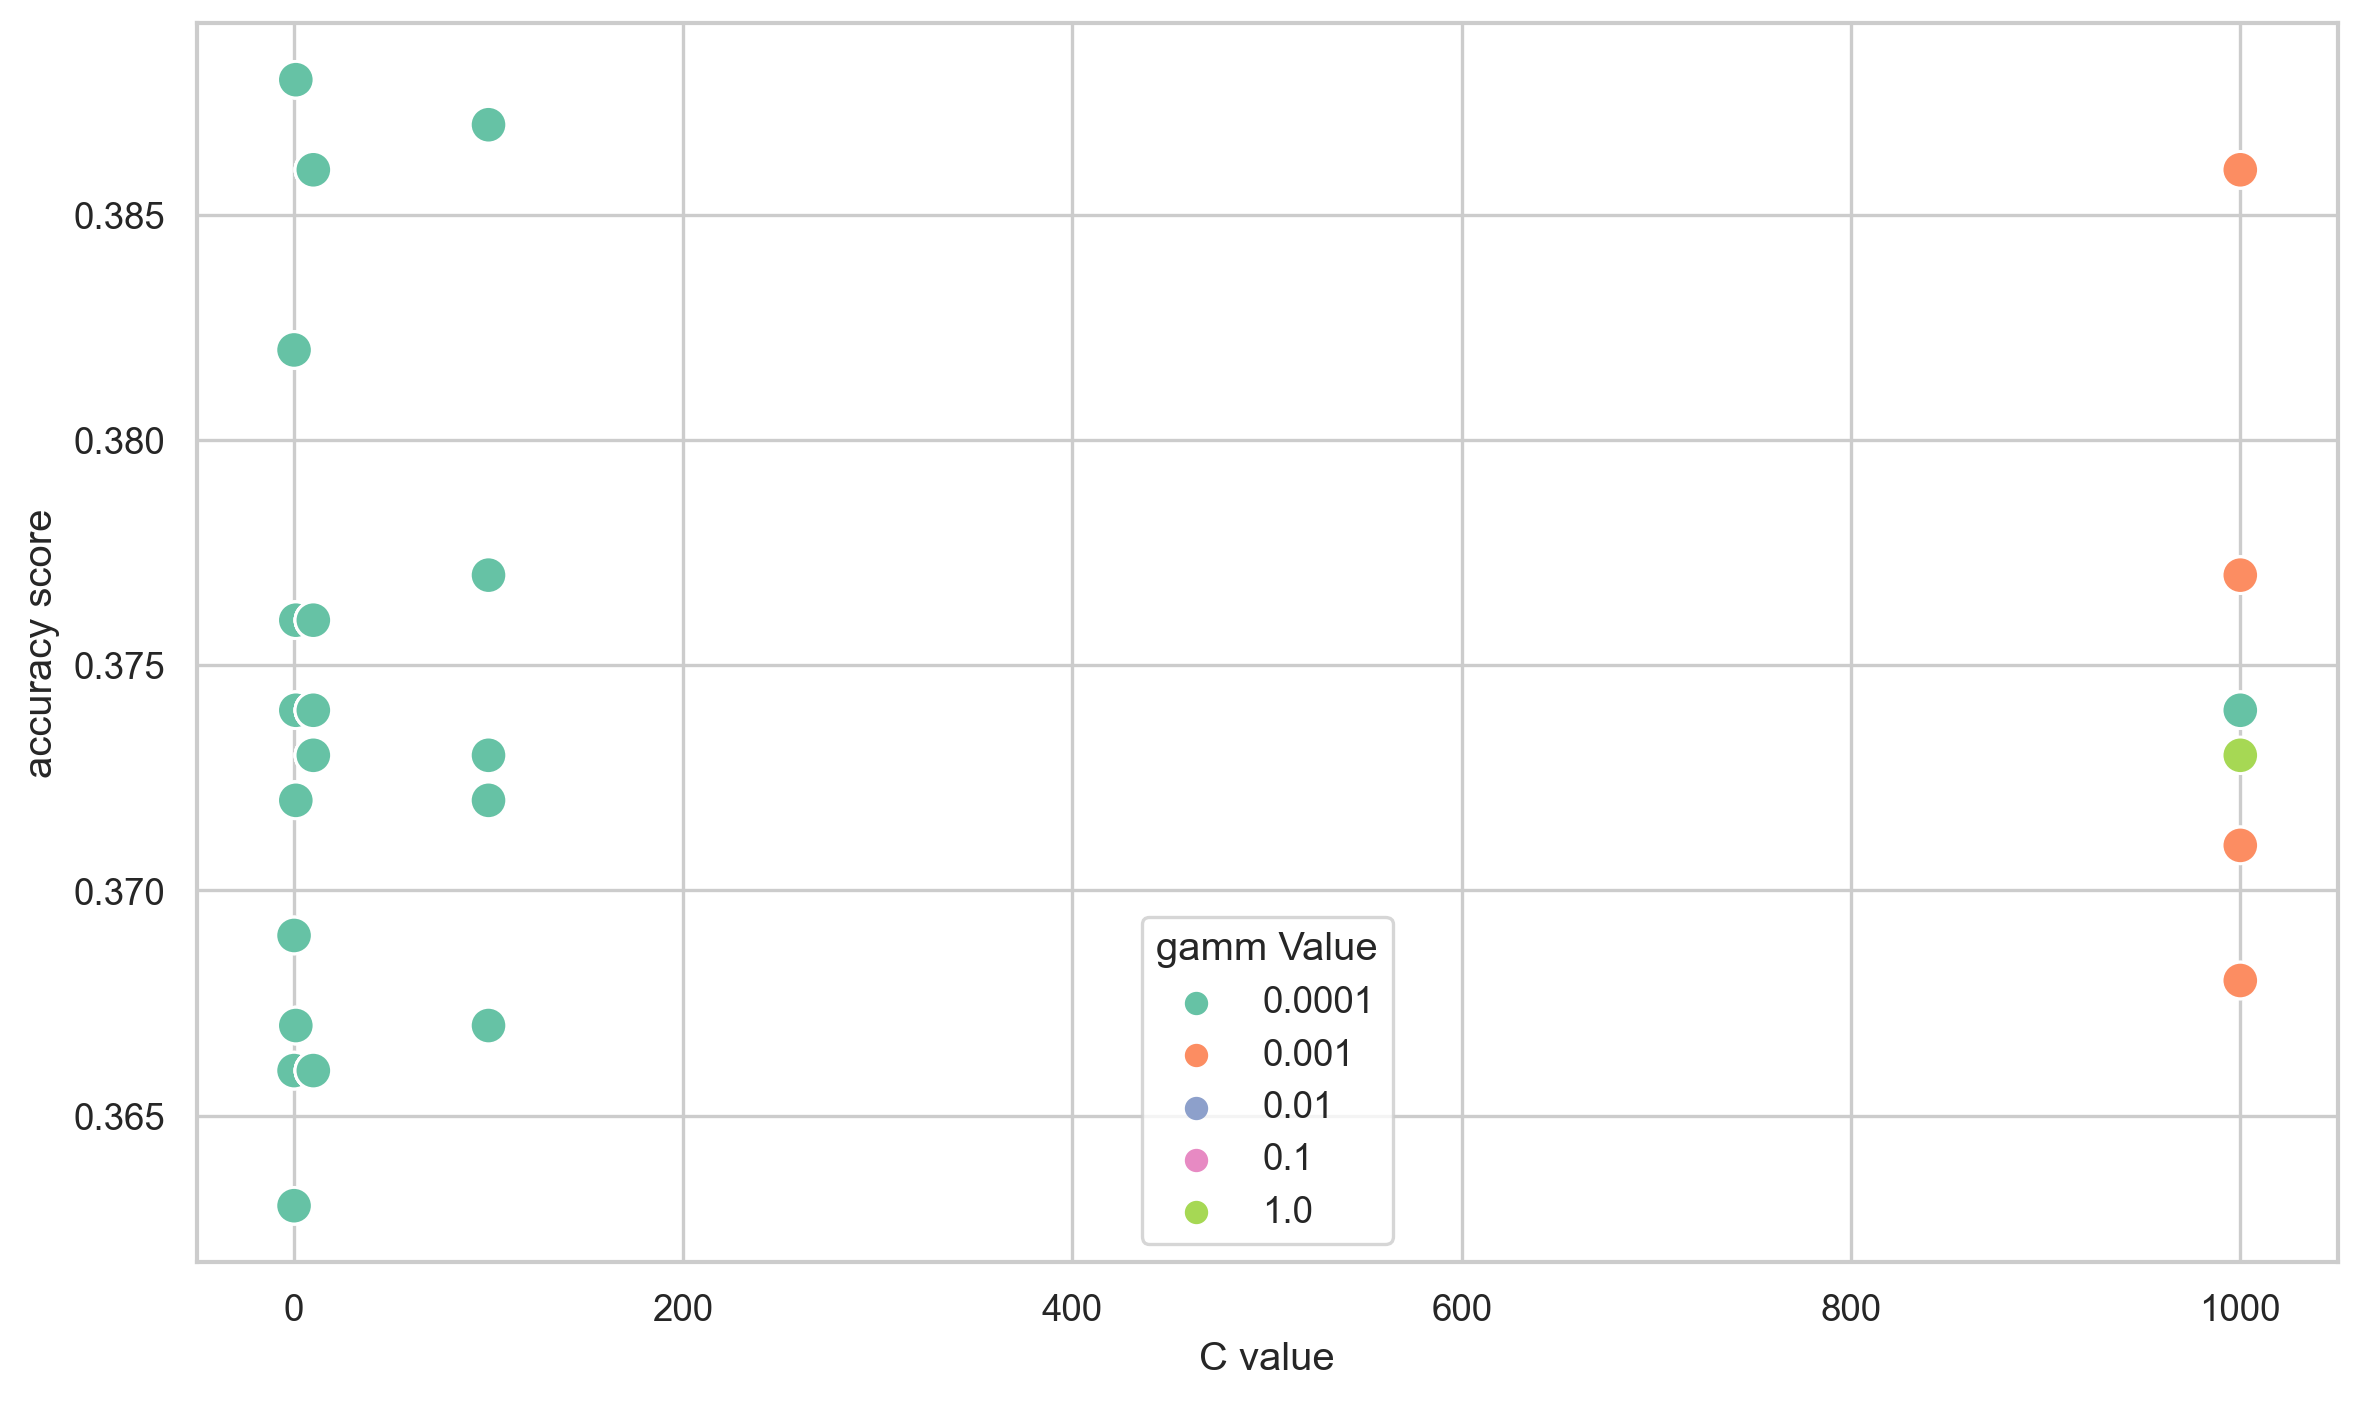

In [66]:
# Plot Scores
plt.figure(figsize=(10, 6), tight_layout=True)

ax = sns.scatterplot(data = svm_linear_results, x='C', y='score',
                    hue='gamma', palette='Set2', s=120)

ax.set(xlabel='C value', ylabel='accuracy score')
ax.legend(title='gamm Value', title_fontsize = 12)

plt.show()

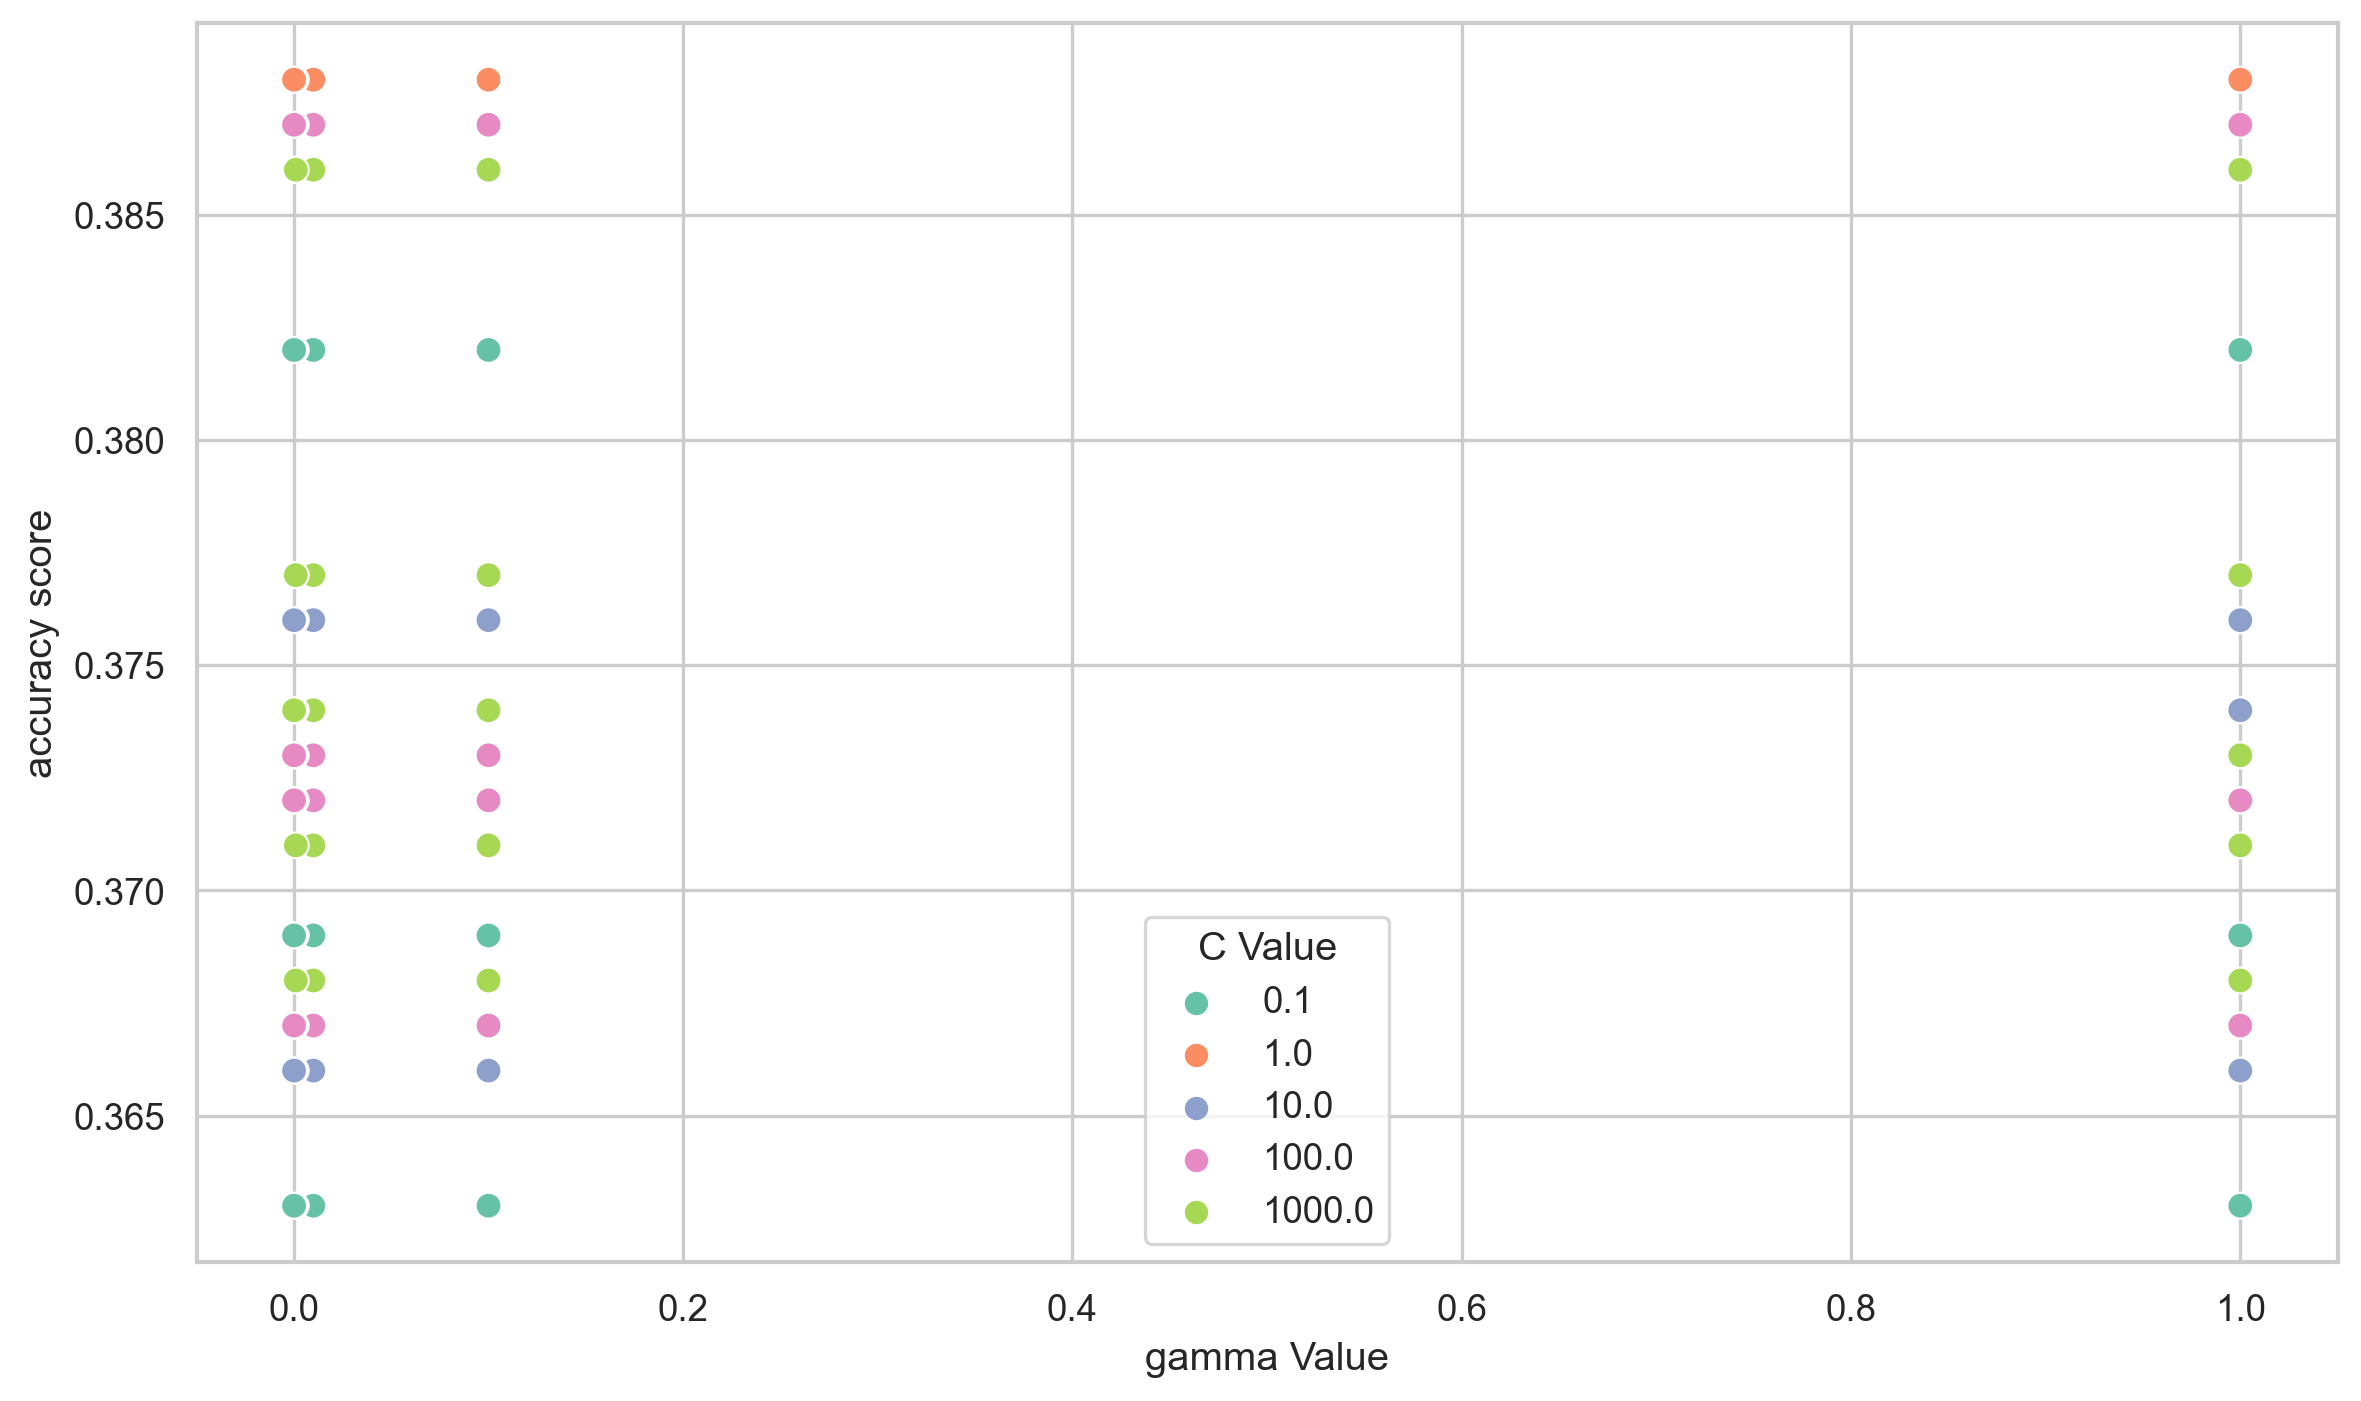

In [67]:
# Plot Scores
plt.figure(figsize=(10, 6), tight_layout=True)

ax = sns.scatterplot(data = svm_linear_results, x='gamma', y='score',
                    hue='C', palette='Set2', s=60)

ax.set(xlabel='gamma Value', ylabel='accuracy score')
ax.legend(title='C Value', title_fontsize = 12)

plt.show()

### Tabled Results 'RBF Kernel' Run

In [68]:
svm_rbf_results = pd.read_csv(r'data_files\rbf_results_table.csv')

In [69]:
print(svm_rbf_results[1:10])

     C  gamma kernel  score  total_time
1  0.1    1.0    rbf  0.365          78
2  0.1    1.0    rbf  0.376          78
3  0.1    1.0    rbf  0.361          78
4  0.1    1.0    rbf  0.366          78
5  0.1    0.1    rbf  0.347          78
6  0.1    0.1    rbf  0.352          78
7  0.1    0.1    rbf  0.350          84
8  0.1    0.1    rbf  0.349          84
9  0.1    0.1    rbf  0.340          84


In [70]:
print(svm_rbf_results['score'].mean())

0.340624


In [71]:
max_value_rbf = svm_rbf_results['score'].max()
print(max_value_rbf)

0.402


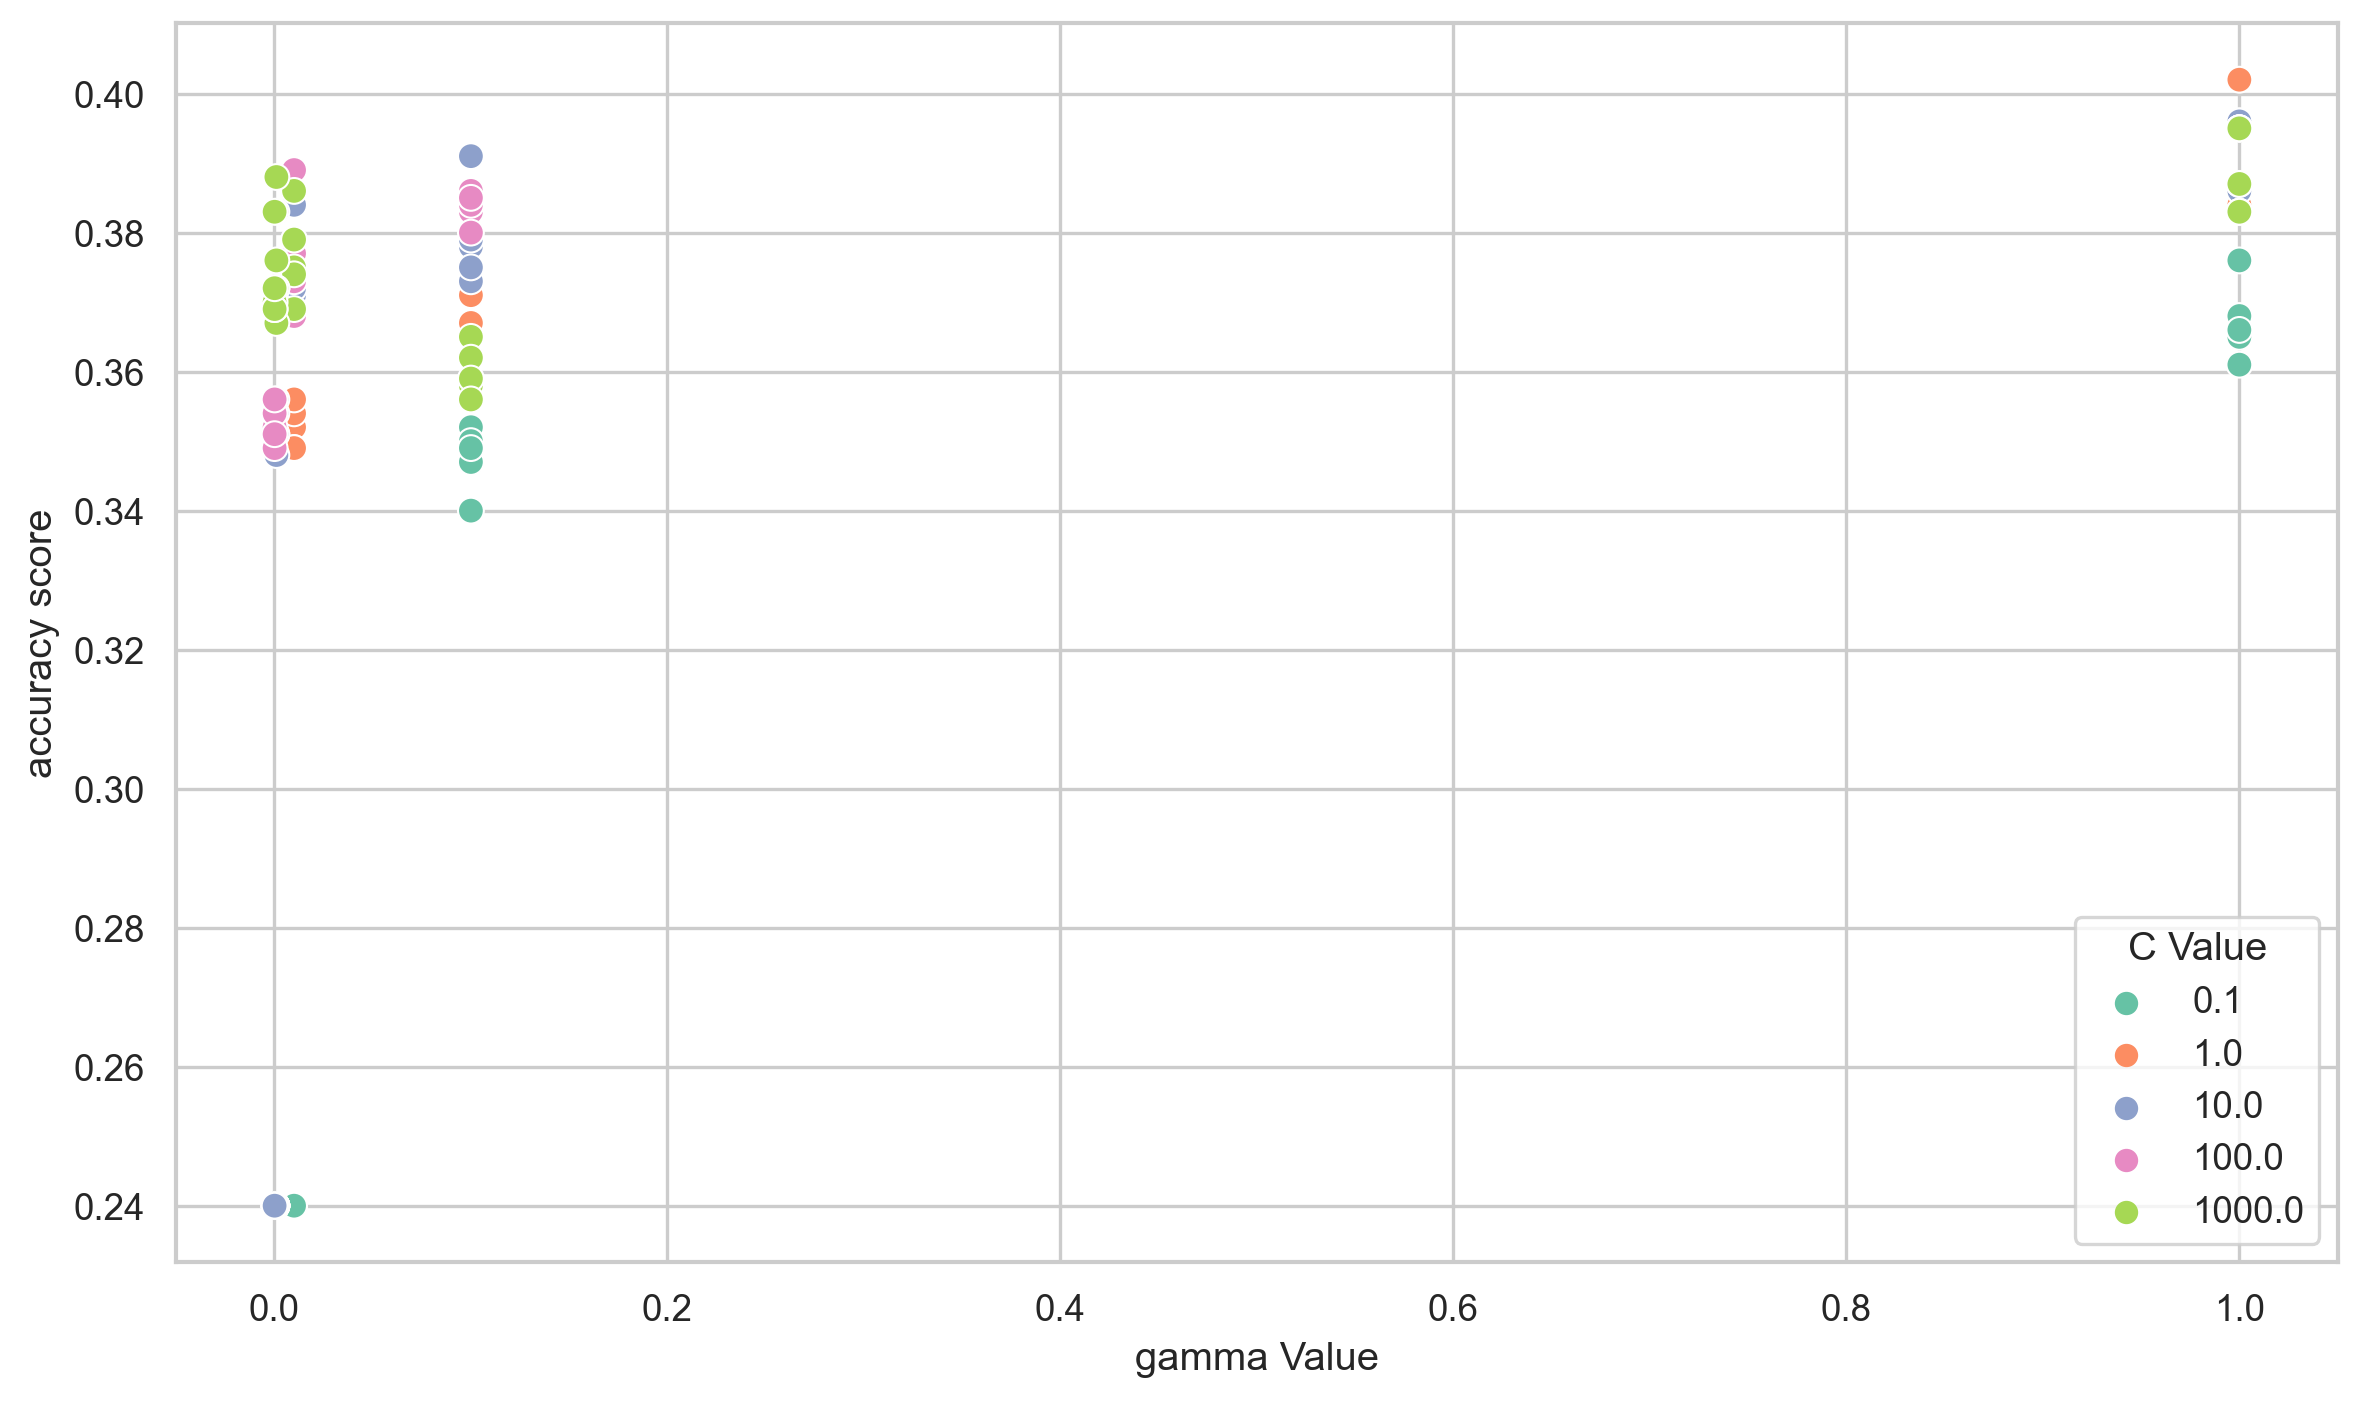

In [72]:
# Plot Scores
plt.figure(figsize=(10, 6), tight_layout=True)

ax = sns.scatterplot(data = svm_rbf_results, x='gamma', y='score',
                    hue='C', palette='Set2', s=60)

ax.set(xlabel='gamma Value', ylabel='accuracy score')
ax.legend(title='C Value', title_fontsize = 12)

plt.show()

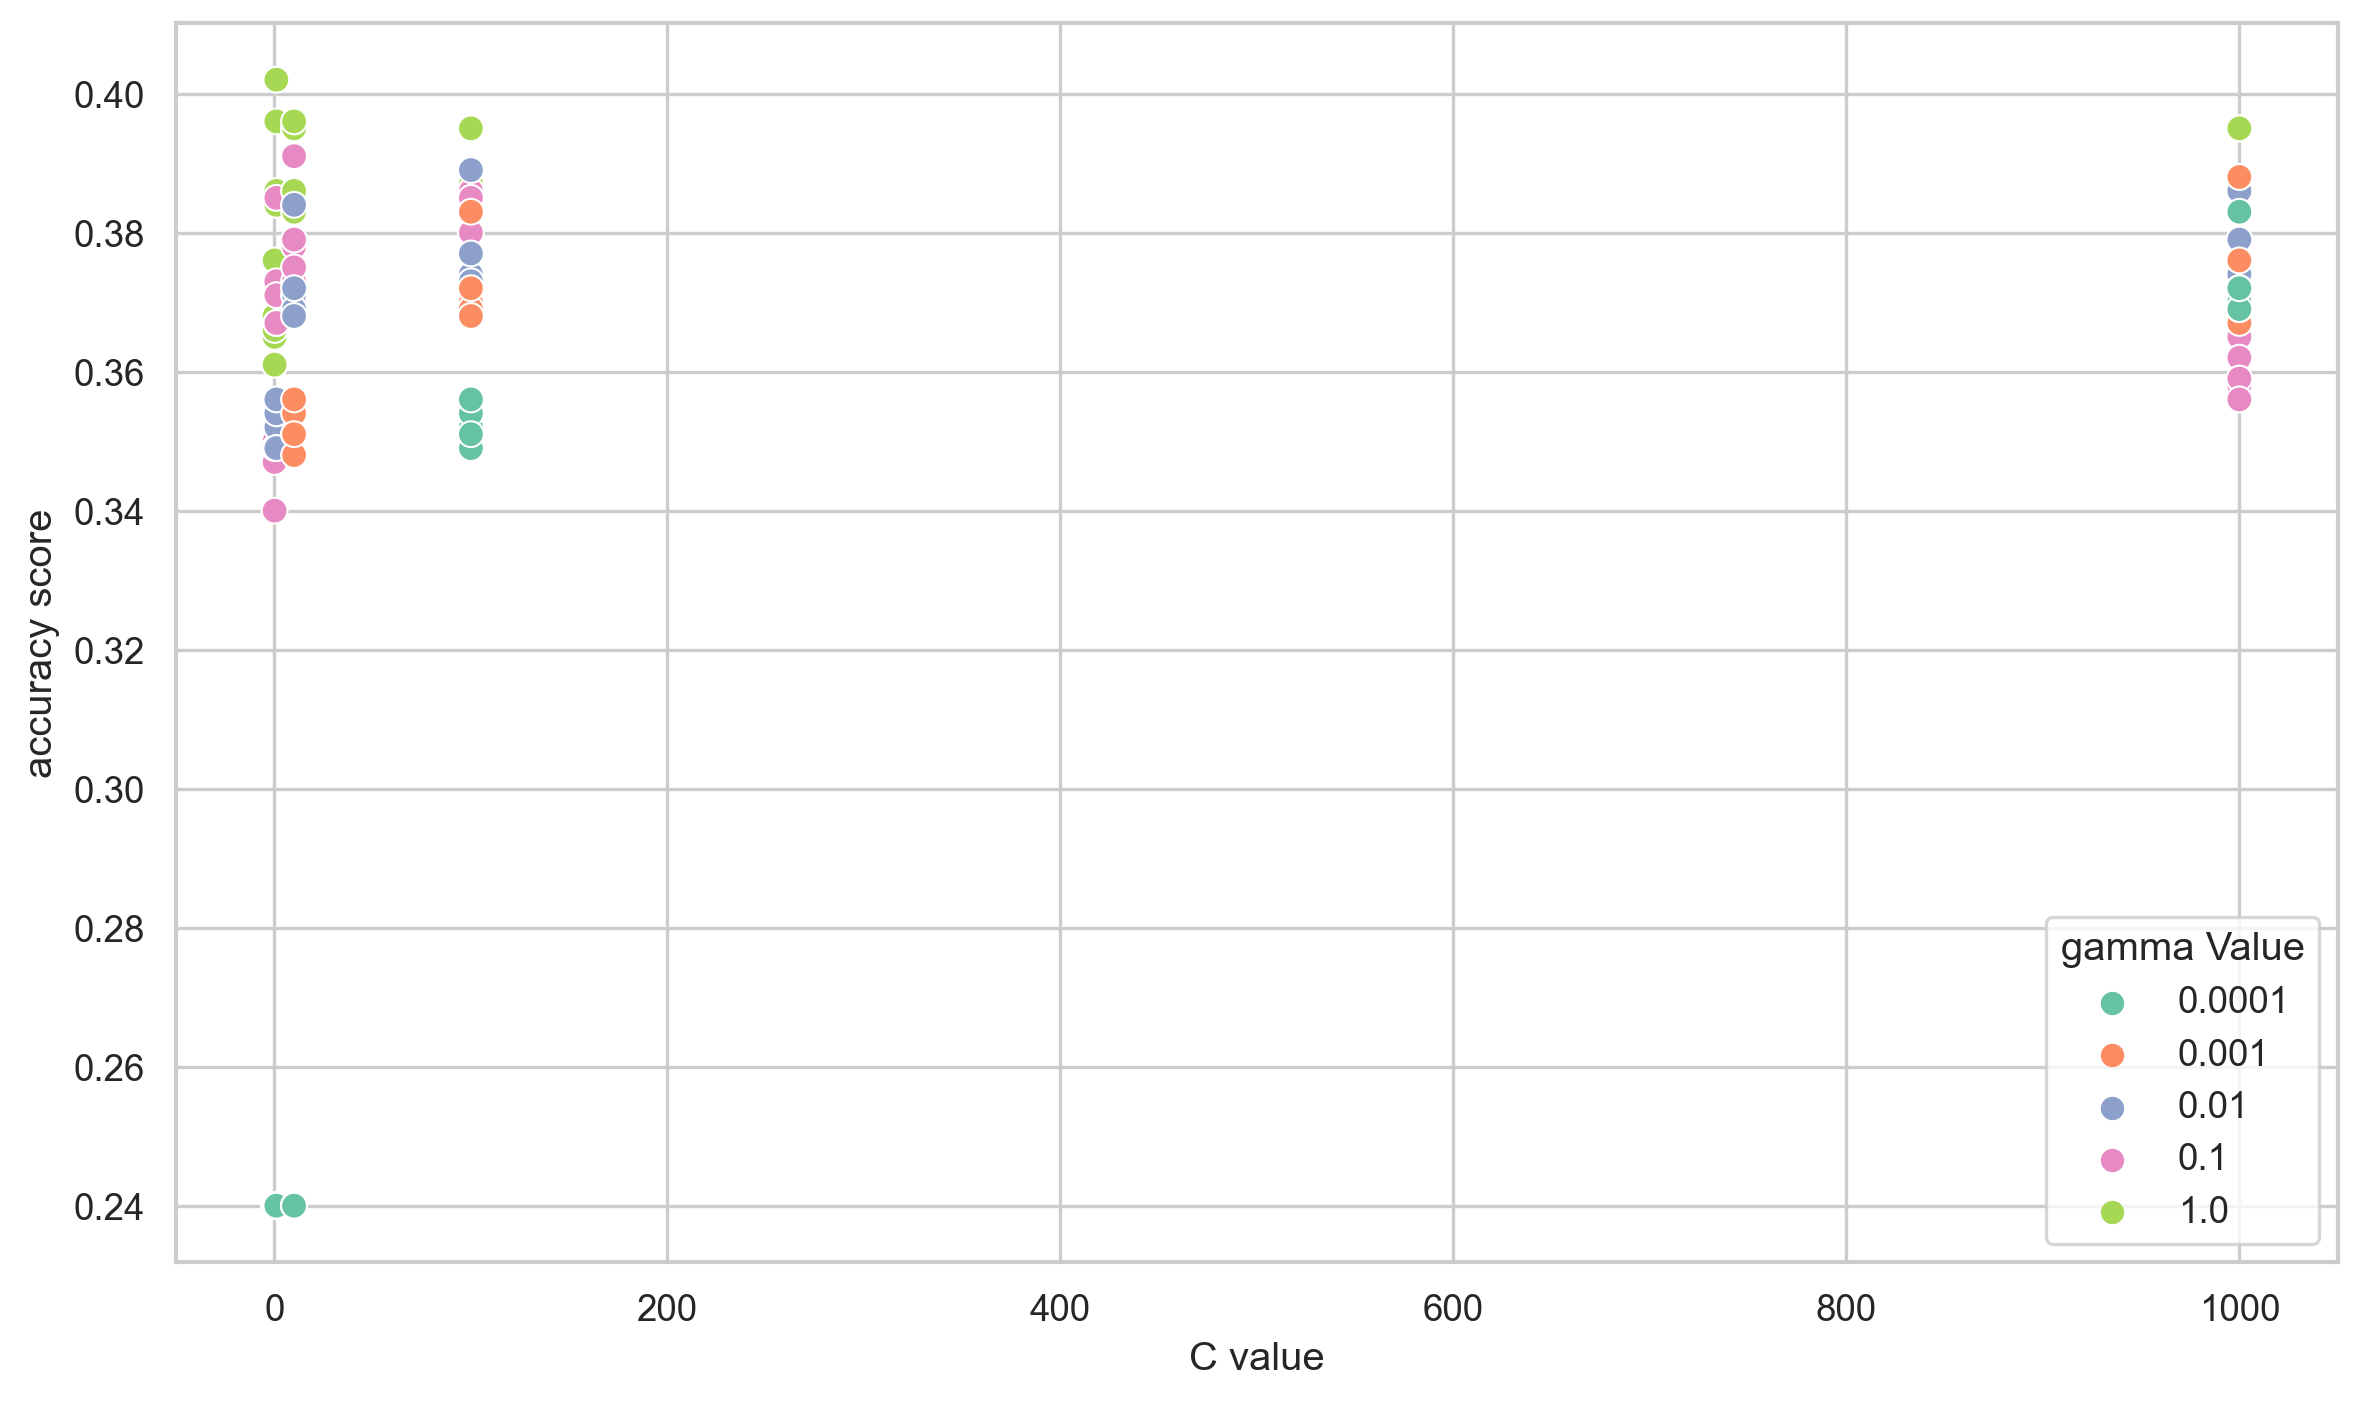

In [73]:
# Plot Scores
plt.figure(figsize=(10, 6), tight_layout=True)

ax = sns.scatterplot(data = svm_rbf_results, x='C', y='score',
                    hue='gamma', palette='Set2', s=60)

ax.set(xlabel='C value', ylabel='accuracy score')
ax.legend(title='gamma Value', title_fontsize = 12)

plt.show()

#### From the above plots, it is observed the best parameter combination is of C value = 1.0 ; gamma value = 0.0001 & 0.001

## Feature Creation (Negative / Neutral / Positive)
#### Attempting to predict values within the range of 1-10 is providing best results of around 40% accuracy. I will now create a new feature assigning a value to the review score based upon whether it is 'negative' / 'neutral' / 'positive
##### negative (1) = 1-4 ; neutral (2) = 5-6 ; positive (3) = 7-10

In [74]:
# checking the reviews
review_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,ReviewScore
0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.066958,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.093367,0.0,0.0,0.000000,0.0,7.0
0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.103006,0.000000,...,0.0,0.0,0.0,0.483886,0.000000,0.0,0.0,0.000000,0.0,2.0
0.092061,0.092061,0.0,0.09981,0.096135,0.0,0.0,0.000000,0.070468,0.000000,0.056607,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.092826,0.0,3.0
0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.340673,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,10.0
0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.294833,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.0


In [75]:
# creating a set of conditions for 'ReviewScore' for values to be assigned to
conditions = [
    (review_df['ReviewScore'] <= 4), # if review score is less than 4
    (review_df['ReviewScore'] == 5), # if review score is 5
    (review_df['ReviewScore'] == 6), # if review score is 6
    (review_df['ReviewScore'] >= 7)  # if review score is greater than 7
]

# list of values to assign to each condition (1,2,2,3)
values = [1,2,2,3] # 1 - negative / 2 - neutral / 3 - positive

# create new column and apply the values based on conditions made
review_df['SentimentScore'] = np.select(conditions, values)

In [76]:
# returning a random sample to check the new feature
review_df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,ReviewScore,SentimentScore
0.0,0.0,0.000000,0.000000,0.0,0.382701,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,10.0,3
0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.174445,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,8.0,3
0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.137691,0.0,0.000000,0.117391,...,0.0,0.0,0.0,0.000000,0.000000,0.211007,0.000000,0.0,3.0,1
0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.254081,0.0,0.070486,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,10.0,3
0.0,0.0,0.126552,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.118630,0.000000,0.000000,0.000000,0.0,4.0,1
0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.066409,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.0,1
0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.118140,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4.0,1
0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.075005,0.153672,...,0.0,0.0,0.0,0.000000,0.112594,0.000000,0.000000,0.0,1.0,1
0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,7.0,3
0.0,0.0,0.000000,0.105497,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.097857,0.000000,0.000000,0.098115,0.0,8.0,3


## Running SVM w/ 'SentimentScore' as target variable
### Now using the new feature created 'SentimentScore' to test the Support Vector Machines accuracy when only using 3 target variables (1, 2 & 3). 1 = Negative ; 2 = Neutral ; 3 = Positive
### The TF-IDF Values will be fed to the SVM to predict the target variable 'SentimentScore'. 

In [77]:
review_df.shape

(28497, 302)

In [78]:
# checking for NaN and that values are finite
review_df.isnull().values.any()

True

In [79]:
# removing NaN columns
review_df = review_df.dropna()

In [80]:
# re-checking the shape to make sure column was removed
review_df.shape

(28496, 302)

### Create Model w/ SentimentScore target variable.

In [81]:
# Splitting data into training / test split + defining new target 'SentimentScore'
x_train, x_test, y_train, y_test = train_test_split(review_df.loc[:,review_df.columns != 'SentimentScore'], review_df['SentimentScore'], test_size=0.3, random_state=109)

In [82]:
# creating a new classifier using 'rbf' kernel as had best results previously
clf2 = svm.SVC(kernel='rbf') # polynomial kernel

In [83]:
# training the model using the training set (70% training, 30% test split)
clf2.fit(x_train, y_train)

SVC()

In [84]:
# predict the response for the test data
y_pred = clf2.predict(x_test)

In [85]:
print(y_pred)

[1 1 3 ... 3 3 3]


### Evaluation

In [86]:
# print accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  1.0


In [87]:
# print precision
print("Precision: ",metrics.precision_score(y_test, y_pred, average='macro'))

Precision:  1.0


In [88]:
# print recall, what % of labels are labeled correctly
print("Recall: ",metrics.recall_score(y_test, y_pred, average='macro'))

Recall:  1.0


In [89]:
print("Classification Report: ",classification_report(y_test,y_pred))

Classification Report:                precision    recall  f1-score   support

           1       1.00      1.00      1.00      3803
           2       1.00      1.00      1.00       765
           3       1.00      1.00      1.00      3981

    accuracy                           1.00      8549
   macro avg       1.00      1.00      1.00      8549
weighted avg       1.00      1.00      1.00      8549



#### Assuming the model is recognizing the relationship between 'ReviewScore' and 'SentimentScore' to produce 100% accuracy, I will remove this column from the dataframe and re-run the model with different kernels to evaluate if the TF-IDF vectors alone produce similar results.

### Pre-Processing

In [90]:
# create new dataframe without the 'ReviewScore' column
ss_df = review_df.drop(['ReviewScore'], axis=1)

In [91]:
# check how the new dataframe is looking
ss_df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,SentimentScore
0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0000,0.000000,0.0,0.158944,0.0,0.0,0.0,0.0,1
0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.186763,0.000000,0.000000,...,0.0,0.2466,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3
0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.120379,0.127763,0.000000,0.000000,...,0.0,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1
0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.166909,...,0.0,0.0000,0.299955,0.0,0.000000,0.0,0.0,0.0,0.0,3
0.121823,0.121823,0.0,0.0,0.0,0.123677,0.0,0.000000,0.000000,0.073122,0.000000,...,0.0,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1


### Data Exploration
#### Creating a plot of the distribution of negative, neutral and positive reviews to check if the results are evenly distributed.

In [92]:
# checking the unique values under the column
ss_df['SentimentScore'].unique()

array([3, 1, 2])

In [93]:
# getting a count for each value
ss_df['SentimentScore'].value_counts()

3    13110
1    12745
2     2641
Name: SentimentScore, dtype: int64

<AxesSubplot:>

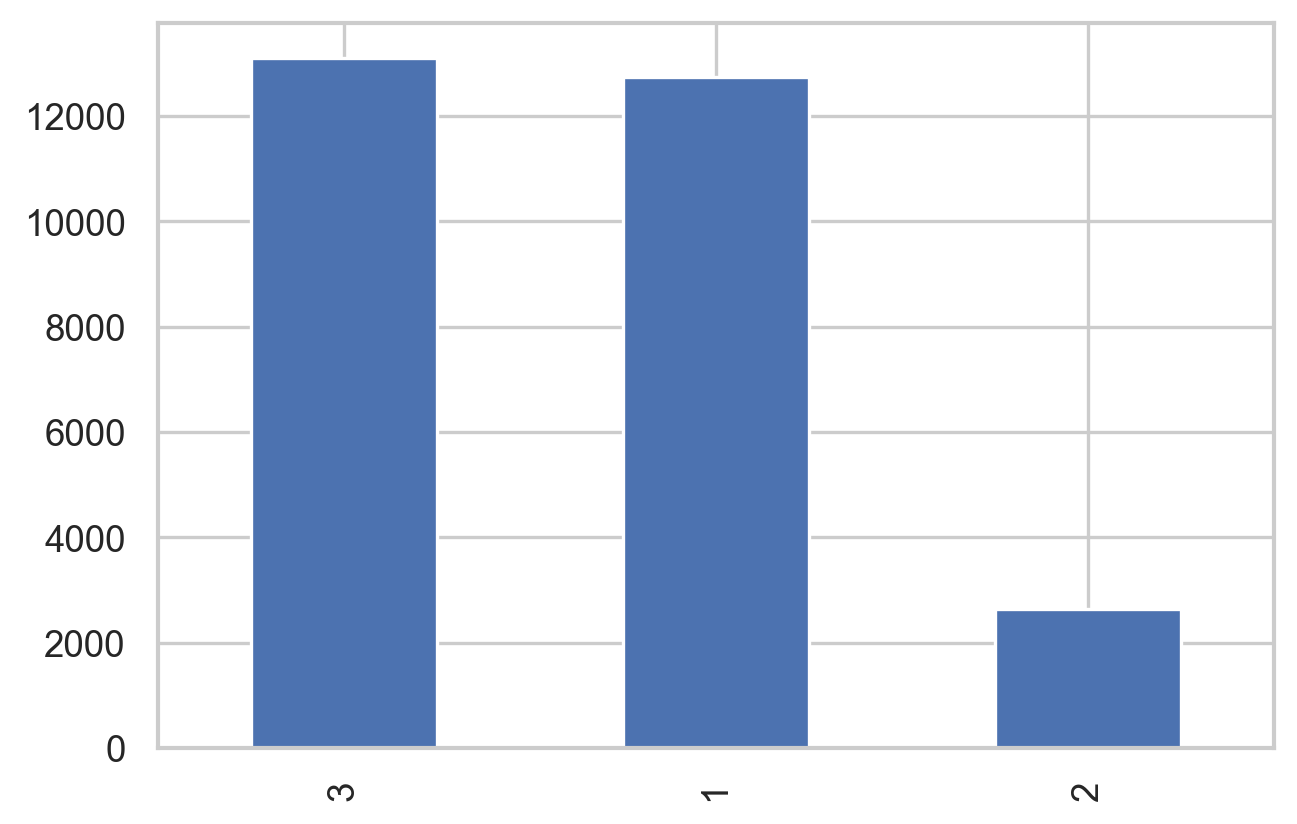

In [94]:
# create plot
ss_df['SentimentScore'].value_counts()[:3].plot(kind='bar')

### Splitting the data (SentimentScore as target variable)

In [95]:
# seperate data into training / test splits (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(ss_df.loc[:,ss_df.columns != 'SentimentScore'], ss_df['SentimentScore'], test_size=0.3, random_state=109)

### Creating SVM Model

In [96]:
# create a classifier using a 'linear kernal'
ss_classifier = svm.SVC(kernel='rbf') # Linear Kernel

In [97]:
# train the svm model using the training sets
ss_classifier.fit(x_train, y_train)

SVC()

In [98]:
# predict a response for the testing set
y_pred = ss_classifier.predict(x_test)

In [99]:
y_test

0.0    1
0.0    1
0.0    3
0.0    3
0.0    3
      ..
0.0    3
0.0    1
0.0    3
0.0    3
0.0    3
Name: SentimentScore, Length: 8549, dtype: int32

In [100]:
y_pred

array([1, 1, 3, ..., 3, 3, 3])

### Evaluation

In [101]:
# printing report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.92      0.88      3803
           2       0.73      0.06      0.11       765
           3       0.84      0.92      0.88      3981

    accuracy                           0.84      8549
   macro avg       0.81      0.63      0.62      8549
weighted avg       0.83      0.84      0.81      8549



In [102]:
# model accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8419698210316996


In [103]:
# check precision of the model
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))

Precision: 0.8053565714542691


In [104]:
# model recall, what % of positive tuples are labeled correctly
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))

Recall: 0.6325694703310034


### Hyper-parameter Tuning

In [ ]:
# importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# define a parameter range
# param_grid = {'C': [0.1, 10, 1000], 'gamma': [1, 0.1, 0.01],'kernel': ['linear']}

#grid03 = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

#grid03.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.793 total time=  27.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.788 total time=  26.7s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.790 total time=  27.3s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.788 total time=  25.9s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.783 total time=  26.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.793 total time=  26.5s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.788 total time=  26.7s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.790 total time=  26.4s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.788 total time=  26.4s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.783 total time=  26.3s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.793 total time=  26.2s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 10, 1000], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear']},
             verbose=3)

### Hyper-parameter Evaluations

In [ ]:
#print(grid03.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'linear'}


##### In this instance, with the removal of C value '1.0' & gamma value '0.0001', the best parameters worked out at a C value of 10; gamma value of 1. 

In [ ]:
#print(grid03.best_estimator_)

SVC(C=10, gamma=1, kernel='linear')


In [ ]:
#grid_predictions = grid03.predict(x_test)

# print classification report
#print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           1       0.80      0.88      0.84      3803
           2       0.00      0.00      0.00       765
           3       0.79      0.87      0.83      3981

    accuracy                           0.80      8549
   macro avg       0.53      0.58      0.56      8549
weighted avg       0.73      0.80      0.76      8549



C:\Users\jorda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#print(param_grid)

{'C': [0.1, 10, 1000], 'gamma': [1, 0.1, 0.01], 'kernel': ['linear']}


In [ ]:
#print(grid03.best_score_)

0.7903944242657284


### Results

In [ ]:
# put the results in a data frame
#grid03_results_df = pd.DataFrame(grid03.cv_results_)

In [ ]:
# check this data frame
#grid03_results_df.sample(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,40.166445,3.495412,2.360691,0.186092,10,1,linear,"{'C': 10, 'gamma': 1, 'kernel': 'linear'}",0.792732,0.790476,0.793933,0.791677,0.783154,0.790394,0.003797,1
6,9861.943086,519.460964,3.014813,0.710258,1000,1,linear,"{'C': 1000, 'gamma': 1, 'kernel': 'linear'}",0.792481,0.790226,0.792931,0.792178,0.783655,0.790294,0.003446,4
1,24.311880,0.120258,2.252585,0.069656,0.1,0.1,linear,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.793233,0.787719,0.789672,0.788167,0.782652,0.788289,0.003420,7
5,39.334904,2.778342,2.676170,0.774612,10,0.01,linear,"{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}",0.792732,0.790476,0.793933,0.791677,0.783154,0.790394,0.003797,1
4,37.625608,0.803262,2.325754,0.225669,10,0.1,linear,"{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}",0.792732,0.790476,0.793933,0.791677,0.783154,0.790394,0.003797,1
7,13847.470201,7017.253482,2.822051,0.973781,1000,0.1,linear,"{'C': 1000, 'gamma': 0.1, 'kernel': 'linear'}",0.792481,0.790226,0.792931,0.792178,0.783655,0.790294,0.003446,4


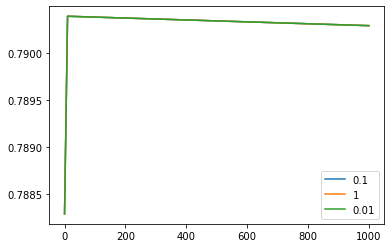

In [ ]:
#gamma_values = set(grid03_results_df['param_gamma'].unique())
#plt.figure()
#for param_gamma in gamma_values:
    #selected_data = grid03_results_df.loc[grid03_results_df['param_gamma'] == param_gamma]
    #plt.plot(selected_data['param_C'].unique(), selected_data['mean_test_score'].unique(), label=param_gamma)
    
#plt.legend()
#plt.show()

In [ ]:
#plt(cv_results_, change='n_estimators', kind='bar')

<AxesSubplot:xlabel='param_C', ylabel='mean_test_score'>

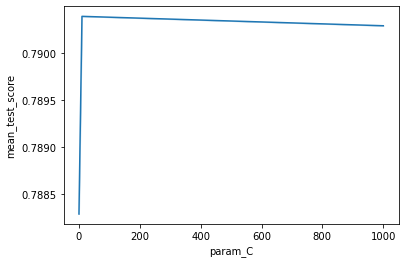

In [ ]:
# create a lineplot to visualize some results
#sns.lineplot(data=grid03_results_df, x="param_C", y="mean_test_score")

<AxesSubplot:xlabel='param_C', ylabel='mean_test_score'>

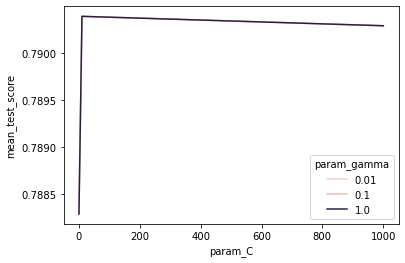

In [ ]:
#sns.lineplot(data=grid03_results_df, x="param_C", y="mean_test_score", hue="param_gamma")

<AxesSubplot:>

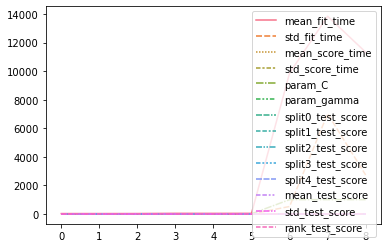

In [ ]:
#sns.lineplot(data=grid03_results_df)

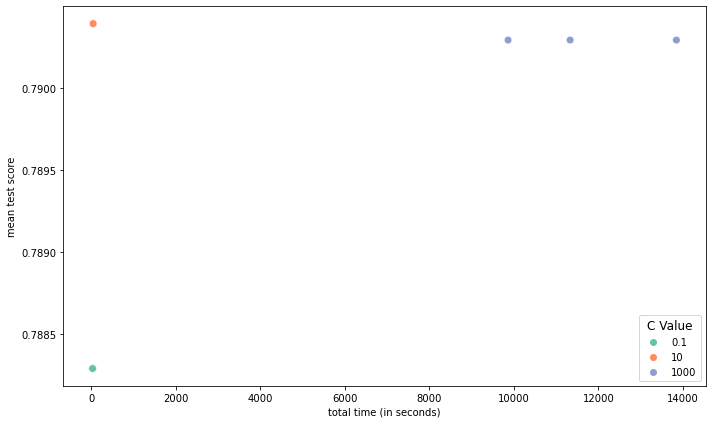

In [ ]:
# Plot Scores
#plt.figure(figsize=(10, 6), tight_layout=True)

#ax = sns.scatterplot(data = grid03_results_df, x='mean_fit_time', y='mean_test_score',hue='param_C', palette='Set2', s=60)

#ax.set(xlabel='total time (in seconds)', ylabel='mean test score')
#ax.legend(title='C Value', title_fontsize = 12)

#plt.show()

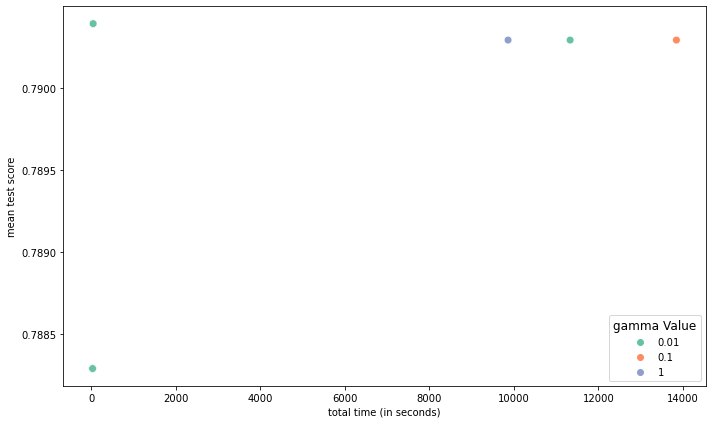

In [ ]:
# Plot Scores
#plt.figure(figsize=(10, 6), tight_layout=True)

#ax = sns.scatterplot(data = grid03_results_df, x='mean_fit_time', y='mean_test_score', hue='param_gamma', palette='Set2', s=60)

#ax.set(xlabel='total time (in seconds)', ylabel='mean test score')
#ax.legend(title='gamma Value', title_fontsize = 12)

#plt.show()

## Cross Validating Best Parameters
### Cross validating using best parameters from both models (target = 1-10 & target = 1,2,3).
#### The best hyperparameters identified in the prediction between values of 1-10 were [C = 1 ; gamma = 0.0001]
#### The best hyperparameters identified in the prediction between values of 1, 2 & 3 ; excluding* the above parameters were [C = 10, gamme = 0.01]

In [ ]:
# define a parameter range
param_grid = {'C': [1.0, 10],
             'gamma': [0.01, 0.0001],
             'kernel': ['linear', 'rbf']}

grid04 = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

grid04.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ..C=1.0, gamma=0.01, kernel=linear;, score=0.795 total time=  30.3s
[CV 2/5] END ..C=1.0, gamma=0.01, kernel=linear;, score=0.789 total time=  26.4s
[CV 3/5] END ..C=1.0, gamma=0.01, kernel=linear;, score=0.795 total time=  28.2s
[CV 4/5] END ..C=1.0, gamma=0.01, kernel=linear;, score=0.789 total time=  26.9s
[CV 5/5] END ..C=1.0, gamma=0.01, kernel=linear;, score=0.783 total time=  26.4s
[CV 1/5] END .....C=1.0, gamma=0.01, kernel=rbf;, score=0.780 total time=  47.3s
[CV 2/5] END .....C=1.0, gamma=0.01, kernel=rbf;, score=0.779 total time=  45.6s
[CV 3/5] END .....C=1.0, gamma=0.01, kernel=rbf;, score=0.784 total time=  47.0s
[CV 4/5] END .....C=1.0, gamma=0.01, kernel=rbf;, score=0.781 total time=  45.9s
[CV 5/5] END .....C=1.0, gamma=0.01, kernel=rbf;, score=0.776 total time=  45.1s
[CV 1/5] END C=1.0, gamma=0.0001, kernel=linear;, score=0.795 total time=  25.4s
[CV 2/5] END C=1.0, gamma=0.0001, kernel=linear;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1.0, 10], 'gamma': [0.01, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

### Results

In [ ]:
print(grid04.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}


In [ ]:
print(grid04.best_score_)

0.7903944242657284


In [ ]:
grid_predictions = grid04.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))

In [ ]:
# put the results in a data frame
grid04_results_df = pd.DataFrame(grid04.cv_results_)

In [ ]:
grid04_results_df.sample

<bound method NDFrame.sample of    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      25.607406      1.418171         2.139657        0.159404     1.0   
1      37.675134      0.650327         8.600822        0.242587     1.0   
2      23.179083      0.336621         1.891379        0.115013     1.0   
3      58.932669      1.027549        14.258321        0.482913     1.0   
4      35.891327      0.790639         2.078629        0.166251      10   
5      33.114110      0.581423         6.788511        0.121659      10   
6      35.974684      0.959862         2.064058        0.116108      10   
7      56.217119      3.548794        13.789372        0.541200      10   

  param_gamma param_kernel                                           params  \
0        0.01       linear    {'C': 1.0, 'gamma': 0.01, 'kernel': 'linear'}   
1        0.01          rbf       {'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}   
2      0.0001       linear  {'C': 1.0, 'gamma': 0.0001,